# EDA on Video Features

Generic:
- Data types ✅
- Missing values / Inconsistency ✅
- Features in each dataset ✅
- Size ✅
- Duplicates ✅

Features:
- What are the types of videos ? ✅
- What are the unique videos ? ✅
- What are famous videos ? ✅
- What is the correlation between engagement and duration ? ✅
- What are the best categories of videos ? ✅

Temporal:
- How long do “famous” videos stay relevant? (popularity lifespan) ✅
- What kinds of videos generate the most rewatches ? ✅
- What is the age of a video's impact ? ✅
- Are there temporal trends in interactions ? ✅
- How quickly do users interact with a new video after it’s posted ? ✅

## Imports

In [16]:
# Import libraries
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import ast
from itertools import chain

from eda_utils import plot_hist_feature

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
colors = plt.get_cmap('tab10').colors
plt.rc('axes', prop_cycle=cycler('color', colors))
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
interactions_train = pd.read_csv("../data_final_project/KuaiRec 2.0/data/big_matrix.csv")
interactions_test = pd.read_csv("../data_final_project/KuaiRec 2.0/data/small_matrix.csv")

## Video Features

We can use the video features including caption and categories.

This may be useful if we were to **recommend a video using its categories and its caption**.

This dataset can also be useful to create **the categories id mapping** (category_id -> category_name)

### Imports

In [4]:
video_features = pd.read_csv("../data_final_project/KuaiRec 2.0/data/kuairec_caption_category.csv", lineterminator='\n')
video_features.head()

,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8,颜值,673,颜值随拍,-124,UNKNOWN
1,1,UNKNOWN,NaN,[],27,高新数码,-124,UNKNOWN,-124,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9,喜剧,727,搞笑互动,-124,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26,摄影,686,主题摄影,2434,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5,时尚,737,营销售卖,2596,女装


In [5]:
video_categories = pd.read_csv("../data_final_project/KuaiRec 2.0/data/item_categories.csv")
video_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


### Generic (Missing values, types, size)

In [9]:
video_features.describe()

,video_id,first_level_category_id,second_level_category_id,third_level_category_id
count,10728.000000,10728.000000,10728.000000,10728.000000
mean,5363.500000,16.545302,266.552386,661.374720
std,3097.051178,13.966887,340.920778,1104.046033
min,0.000000,-124.000000,-124.000000,-124.000000
25%,2681.750000,7.000000,-124.000000,-124.000000
50%,5363.500000,15.000000,223.000000,-124.000000
75%,8045.250000,28.000000,681.250000,1524.000000
max,10727.000000,39.000000,749.000000,2676.000000


In [11]:
missing = video_features.isnull().mean().sort_values(ascending=False) * 100
print("Missing values (%):\n", missing)

# Check for 'UNKNOWN' placeholders
for col in ['caption', 'manual_cover_text', 'first_level_category_name', 'second_level_category_name', 'third_level_category_name']:
    unknown_count = (video_features[col] == 'UNKNOWN').sum()
    print(f"{col}: {unknown_count} UNKNOWN entries")

Missing values (%):
 caption                       12.6305
video_id                       0.0000
manual_cover_text              0.0000
topic_tag                      0.0000
first_level_category_id        0.0000
first_level_category_name      0.0000
second_level_category_id       0.0000
second_level_category_name     0.0000
third_level_category_id        0.0000
third_level_category_name      0.0000
dtype: float64
caption: 0 UNKNOWN entries
manual_cover_text: 6694 UNKNOWN entries
first_level_category_name: 40 UNKNOWN entries
second_level_category_name: 3583 UNKNOWN entries
third_level_category_name: 6832 UNKNOWN entries


In [12]:
video_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   video_id                    10728 non-null  int64 
 1   manual_cover_text           10728 non-null  object
 2   caption                     9373 non-null   object
 3   topic_tag                   10728 non-null  object
 4   first_level_category_id     10728 non-null  int64 
 5   first_level_category_name   10728 non-null  object
 6   second_level_category_id    10728 non-null  int64 
 7   second_level_category_name  10728 non-null  object
 8   third_level_category_id     10728 non-null  int64 
 9   third_level_category_name   10728 non-null  object
dtypes: int64(4), object(6)
memory usage: 838.3+ KB


### Categories

For simplicity only the first category will be used (395 dummies vs 39 dummies)

#### Unique categories

In [8]:
unique_category_id = set(video_features.first_level_category_id.unique()).union(set(video_features.second_level_category_id.unique())).union(set(video_features.third_level_category_id.unique()))
print(sorted(list(map(lambda x: int(x), unique_category_id))))
print(f"{len(unique_category_id)} unique categories")
print(f"{len(set(video_features.first_level_category_id.unique()))} first unique categories")

[-124, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 110, 115, 118, 119, 126, 128, 129, 130, 136, 147, 153, 154, 155, 160, 161, 162, 163, 167, 168, 169, 170, 179, 195, 201, 203, 204, 213, 214, 220, 223, 224, 232, 233, 235, 263, 264, 267, 268, 270, 271, 272, 292, 314, 317, 318, 319, 324, 325, 327, 330, 341, 347, 348, 352, 354, 368, 372, 373, 374, 386, 387, 389, 402, 418, 545, 548, 561, 563, 564, 593, 665, 666, 667, 670, 672, 673, 674, 675, 677, 678, 679, 680, 681, 682, 683, 684, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 701, 702, 703, 705, 706, 707, 708, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 727, 728, 729, 732, 733, 735, 736, 737, 738, 739, 744, 745, 747, 748, 749, 1051, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1063, 1064, 1065, 1066, 1069, 1102, 1104, 1106, 1121, 1123, 1132, 1133, 1142, 1143, 1144, 1148, 1149, 1150, 1152, 115

#### Distribution of categories on all three categories

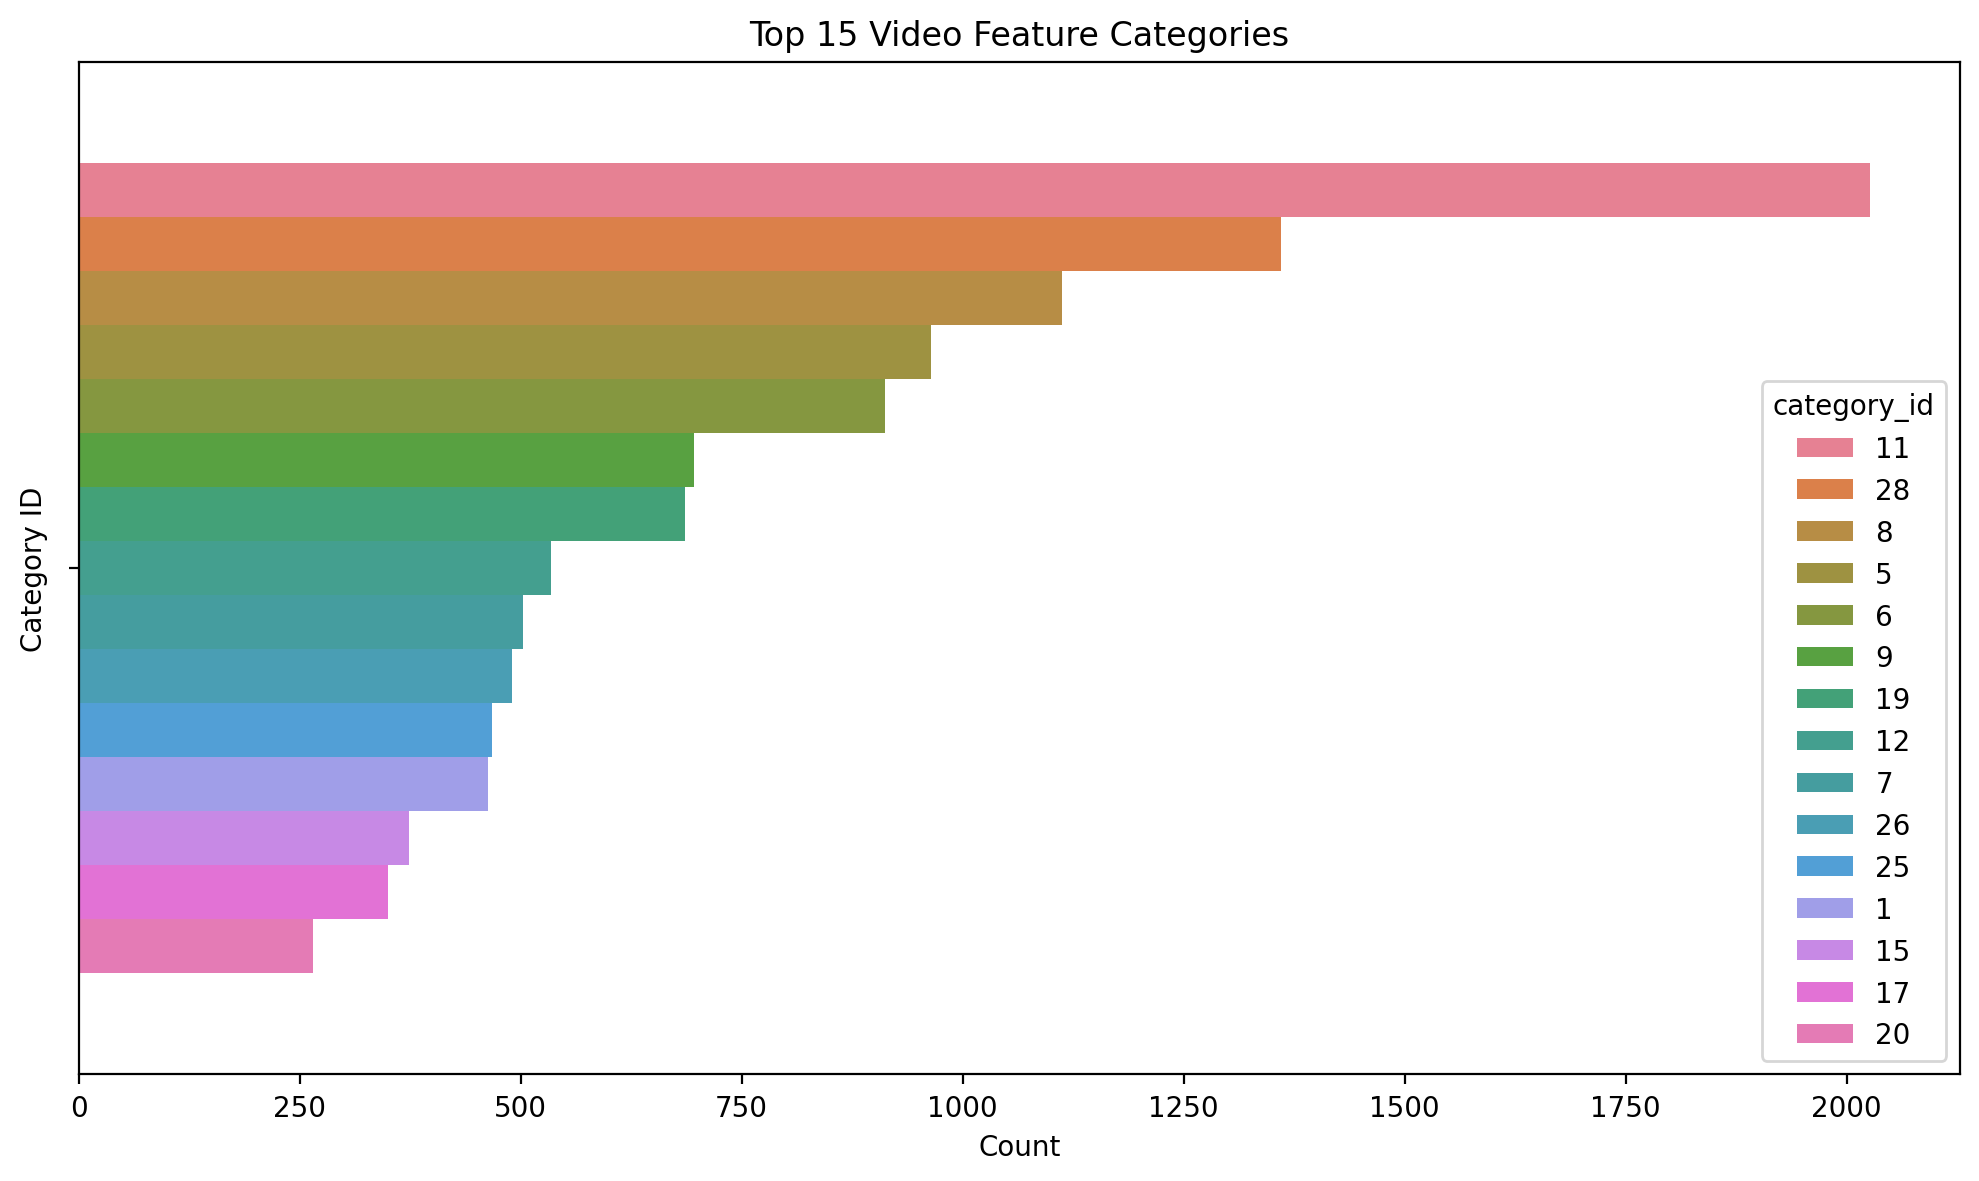

In [64]:
# Exploding the 'feat' column to make each category feature its own row
exploded = video_categories.explode('feat')
exploded['feat'] = exploded['feat'].astype(str)

# First-level mapping (category_id -> category_name)
first_map = video_features[['first_level_category_id', 'first_level_category_name']].drop_duplicates()
first_map.columns = ['category_id', 'category_name']

# Second-level mapping (category_id -> category_name)
second_map = video_features[['second_level_category_id', 'second_level_category_name']].drop_duplicates()
second_map.columns = ['category_id', 'category_name']

# Third-level mapping (category_id -> category_name)
third_map = video_features[['third_level_category_id', 'third_level_category_name']].drop_duplicates()
third_map.columns = ['category_id', 'category_name']

# Combine all levels into a single category map
category_map = pd.concat([first_map, second_map, third_map]).drop_duplicates(subset='category_id')

# Top features merge
top_feats = exploded['feat'].value_counts().head(15).reset_index()
top_feats.columns = ['category_id', 'count']

top_feats['category_id'] = top_feats['category_id'].astype(str).str.replace('[', '').str.replace(']', '')
category_map['category_id'] = category_map['category_id'].astype(str)

top_feats_named = top_feats.merge(category_map, on='category_id', how='left')

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(hue=top_feats_named['category_id'], x=top_feats_named['count'])
plt.title('Top 15 Video Feature Categories')
plt.xlabel('Count')
plt.ylabel('Category ID')
plt.tight_layout()
plt.show()

#### Distribution of categories only on the first category

Taking the first category only is an approximation, top ranking is similar but not equivalent

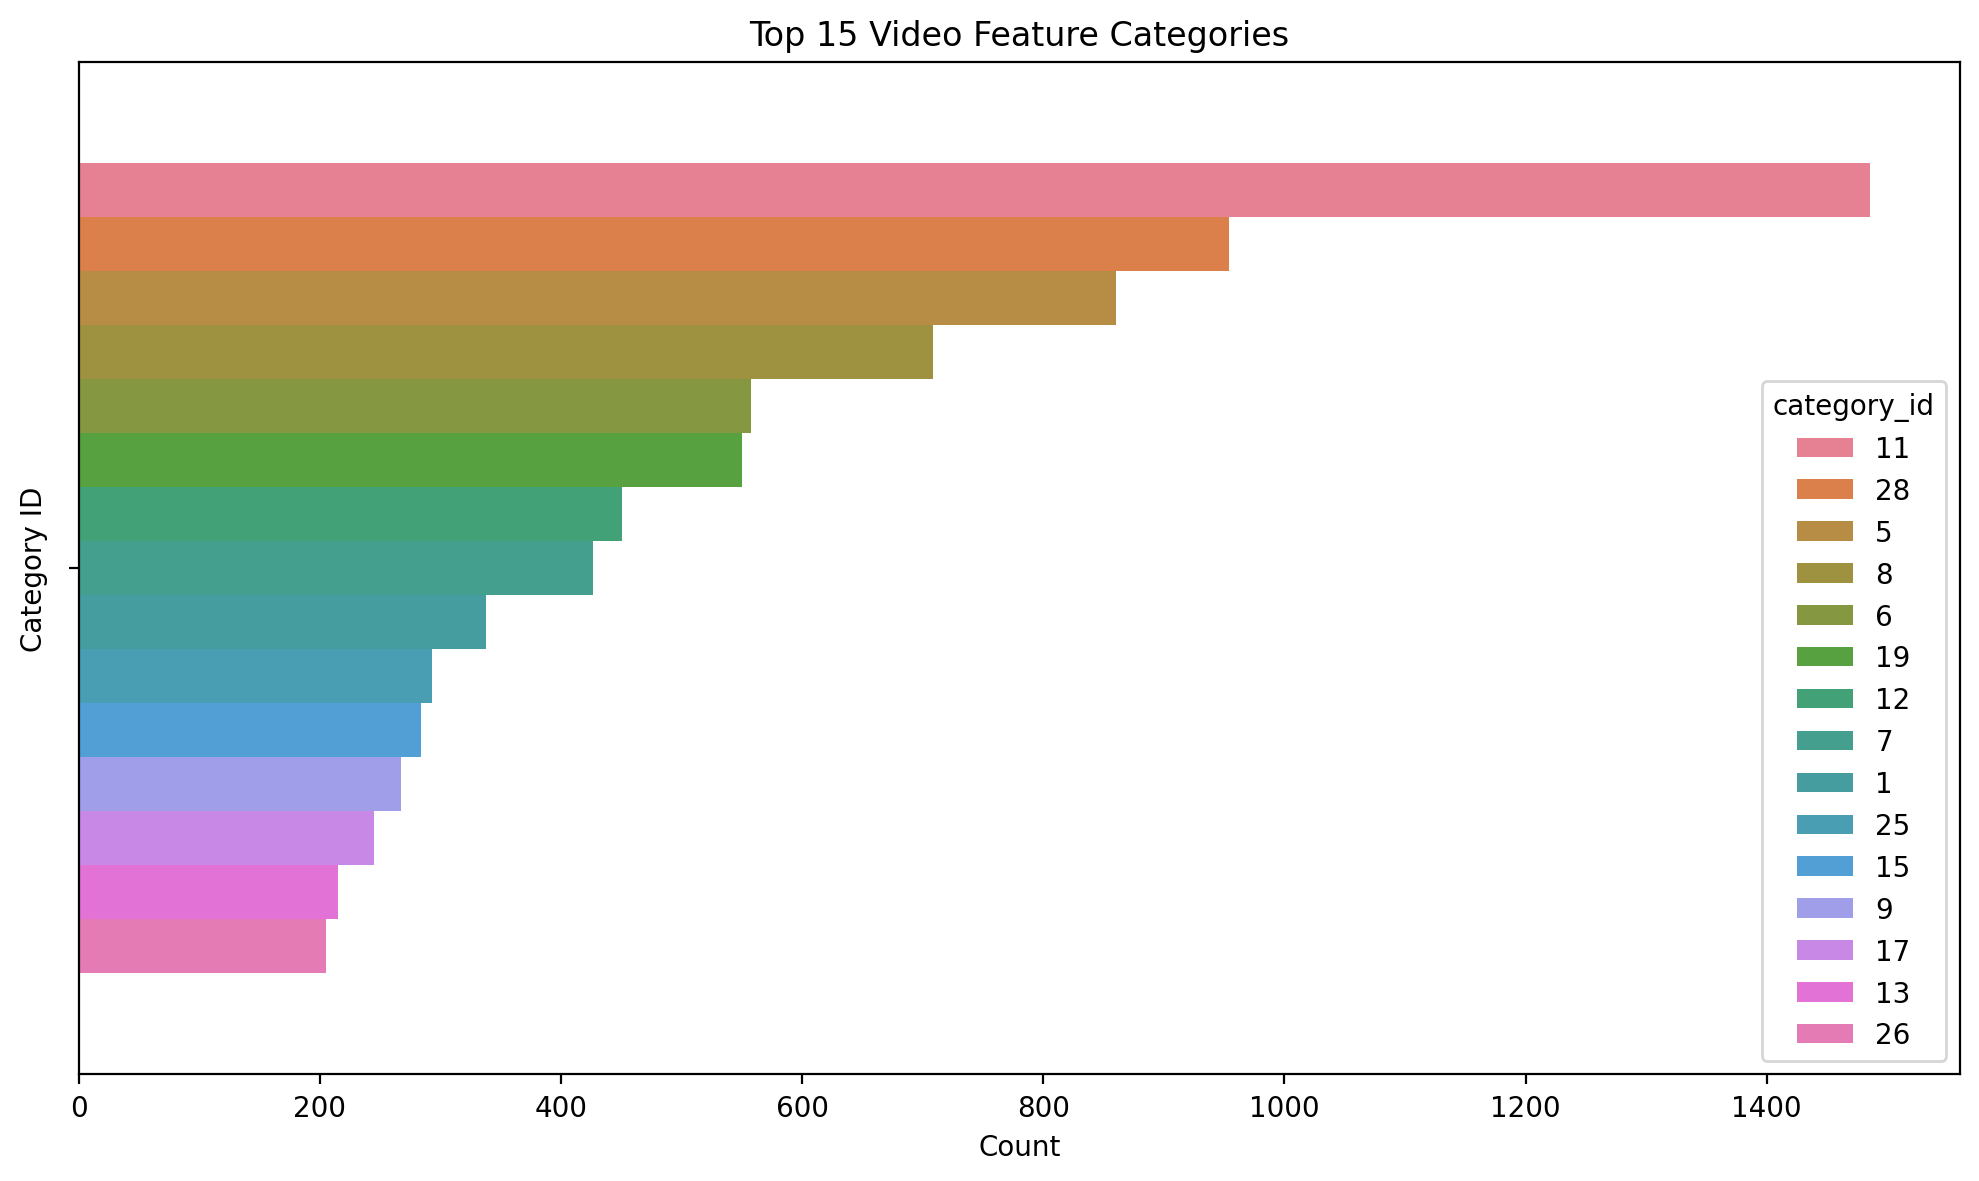

In [10]:
# Exploding the 'feat' column to make each category feature its own row
exploded = video_categories.explode('feat')
exploded['feat'] = exploded['feat'].astype(str)

# First-level mapping (category_id -> category_name)
first_map = video_features[['first_level_category_id', 'first_level_category_name']].drop_duplicates()
first_map.columns = ['category_id', 'category_name']

# Combine all levels into a single category map
category_map = pd.concat([first_map]).drop_duplicates(subset='category_id')

# Top features merge
top_feats = exploded['feat'].value_counts().head(15).reset_index()
top_feats.columns = ['category_id', 'count']

top_feats['category_id'] = top_feats['category_id'].astype(str).str.replace('[', '').str.replace(']', '')
category_map['category_id'] = category_map['category_id'].astype(str)

top_feats_named = top_feats.merge(category_map, on='category_id', how='left')

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(hue=top_feats_named['category_id'], x=top_feats_named['count'])
plt.title('Top 15 Video Feature Categories')
plt.xlabel('Count')
plt.ylabel('Category ID')
plt.tight_layout()
plt.show()

Some categories are used a lot in the dataset, it includes categories like:
- 11: Life
- 28: People's livelihood information
- 5: Fashion
- 8: Appearance
- 6: Star Entertainment

In [12]:
print(top_feats_named)
# 11 -> Life
# 28 -> People's livelihood information
# 5 -> Fashion
# 8 -> Appearance
# 6 -> Star Entertainment
# 7 -> sports

   category_id  count category_name
0           11   1486            生活
1           28    954          民生资讯
2            5    860            时尚
3            8    709            颜值
4            6    558          明星娱乐
5           19    550            情感
6           12    451            美食
7            7    427            运动
8            1    338            舞蹈
9           25    293            亲子
10          15    284            艺术
11           9    267            喜剧
12          17    245            宠物
13          13    215            三农
14          26    205            摄影


### Catpions and Tags

#### Distribution of Caption Lenght and Tag counts

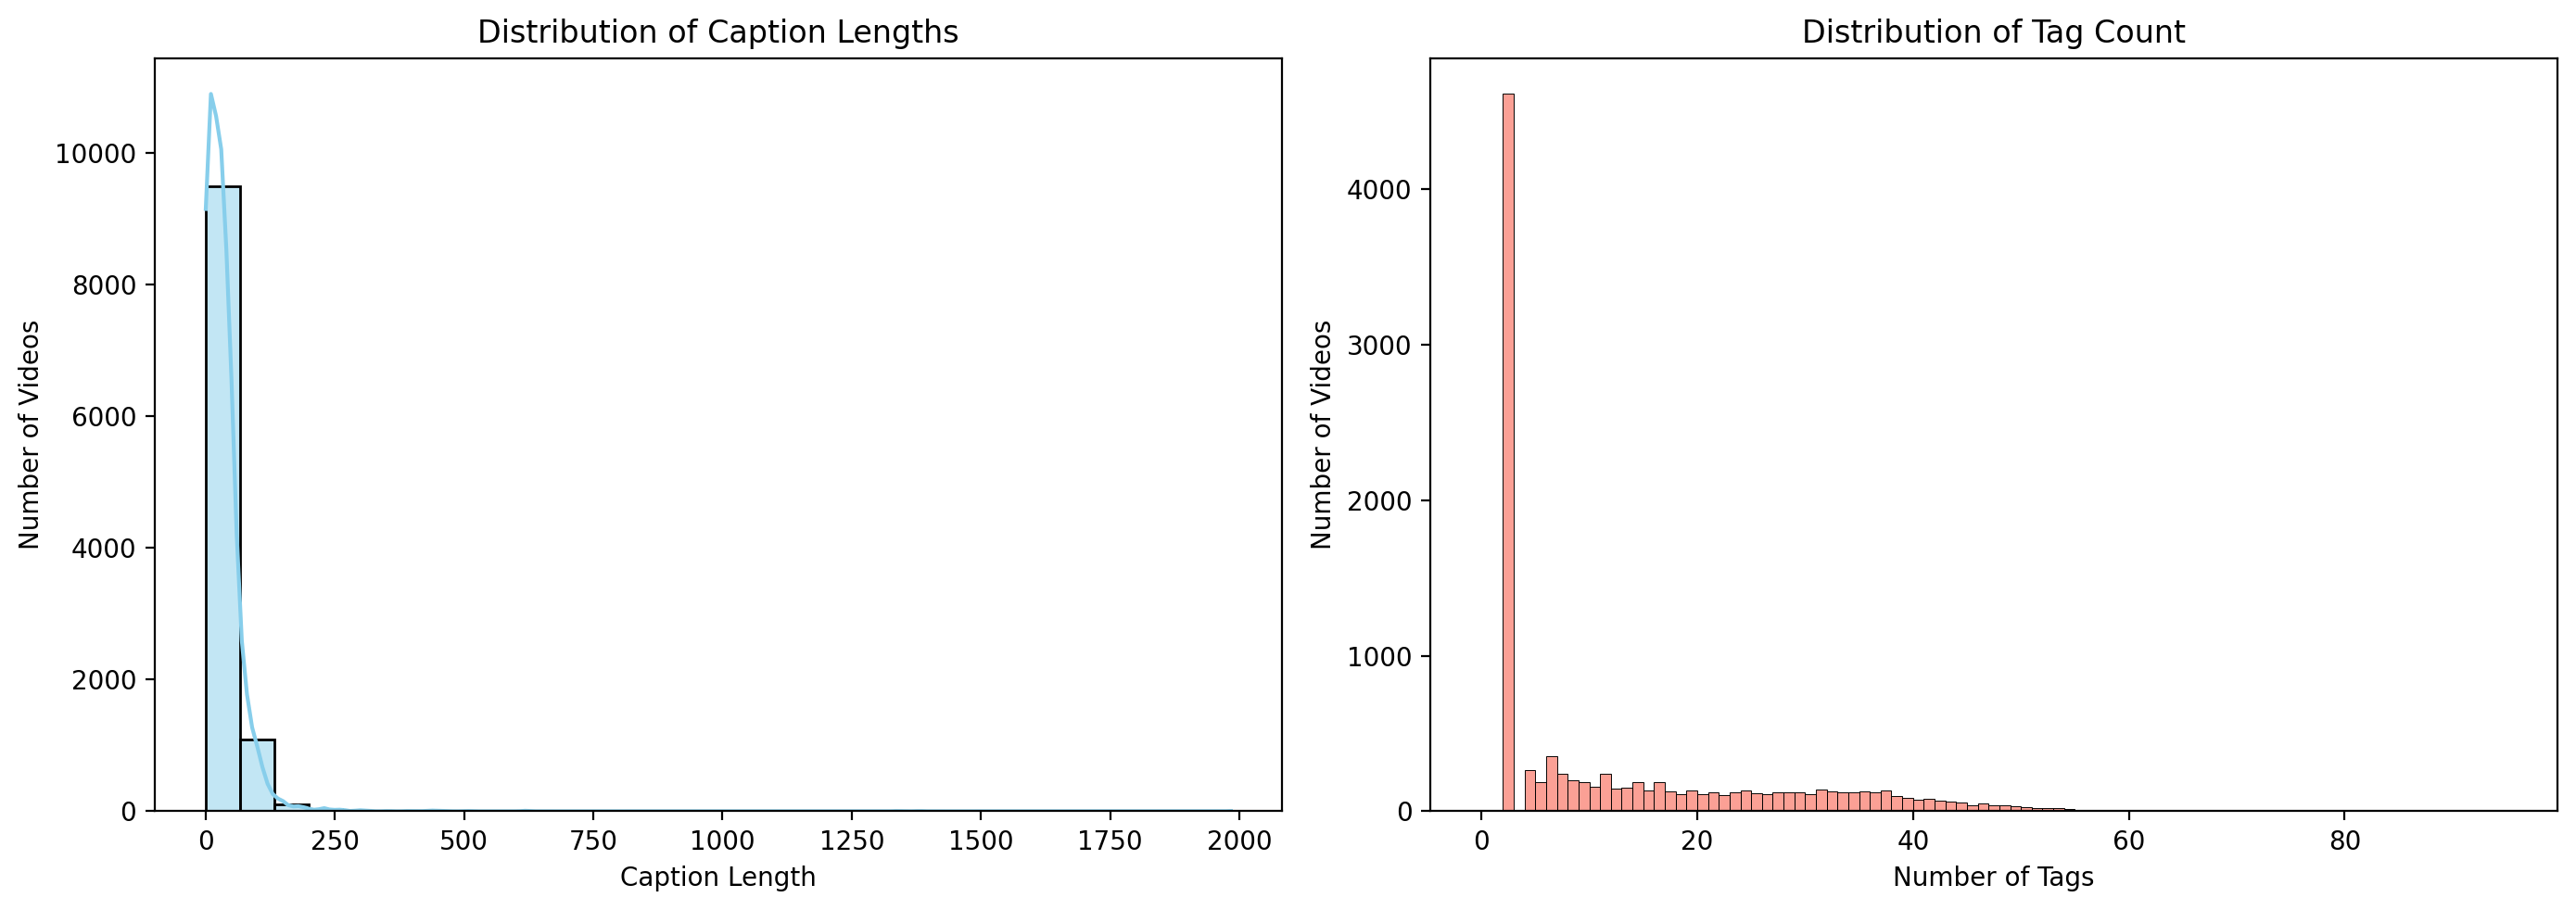

In [62]:
video_features['caption_len'] = video_features['caption'].fillna('').apply(len)
video_features['tag_count'] = video_features['topic_tag'].apply(lambda x: len(x) if isinstance(x, str) else 0)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot caption length distribution
sns.histplot(video_features['caption_len'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Caption Lengths')
axes[0].set_xlabel('Caption Length')
axes[0].set_ylabel('Number of Videos')

# Plot tag count distribution
sns.histplot(video_features['tag_count'], bins=range(0, video_features['tag_count'].max()+1), kde=False, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Tag Count')
axes[1].set_xlabel('Number of Tags')
axes[1].set_ylabel('Number of Videos')

plt.tight_layout()
plt.show()

#### Unique Tags

We have more than 6000 different tags, using OHE is not a valid solution.

An interesting approach would be to use TF-IDF on the concatenation of tags and captions

In [24]:
def parse_tags(tag_str):
    if isinstance(tag_str, str):
        tag_str = tag_str.strip("[]")
        tags = [tag.strip() for tag in tag_str.split(",") if tag.strip()]
        return tags
    return []

all_tags = video_features['topic_tag'].apply(parse_tags)

from sklearn.feature_extraction.text import TfidfVectorizer

video_features['tags_str'] = all_tags.apply(lambda tags: ' '.join(tags))

flat_tags = list(chain.from_iterable(all_tags))
unique_tags = set(flat_tags)

print(f"Number of unique topic tags: {len(unique_tags)}")

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11472 stored elements and shape (10728, 512)>
  Coords	Values
  (4, 258)	0.5066562193256128
  (4, 301)	0.8621481748624633
  (8, 250)	0.3961385200110076
  (8, 267)	0.606215387274983
  (8, 268)	0.6896210388282328
  (10, 258)	0.4128729118994476
  (10, 41)	0.4332998721672415
  (10, 102)	0.8011162084239236
  (12, 364)	0.7191880534570451
  (12, 365)	0.6948154746151431
  (14, 258)	0.6248143275559476
  (14, 250)	0.780773370499282
  (15, 258)	1.0
  (23, 165)	0.6146907386414
  (23, 172)	0.44694751213687367
  (23, 279)	0.6499178542117067
  (28, 366)	1.0
  (32, 194)	1.0
  (33, 462)	1.0
  (36, 301)	0.4759642905026142
  (36, 23)	0.6568705796806106
  (36, 274)	0.5847897363295647
  (41, 35)	0.4682671366818095
  (41, 53)	0.5417315204523879
  (41, 238)	0.39951834070039915
  :	:
  (10706, 420)	0.6932854198536238
  (10708, 26)	1.0
  (10709, 95)	0.4308087392967792
  (10709, 264)	0.5067218640464156
  (10709, 421)	0.7467508169683148
  (10715, 41)	

### Correlation between Watch Ratio and Categories

It’s clear that a small subset of categories accounts for the majority of user engagement, with just 16 categories representing 95% of total interactions.

The average watch ratio across these popular categories consistently is greater than 0.7, indicating user's interest.

These categories should therefore be assigned greater importance or weighting in the final model.

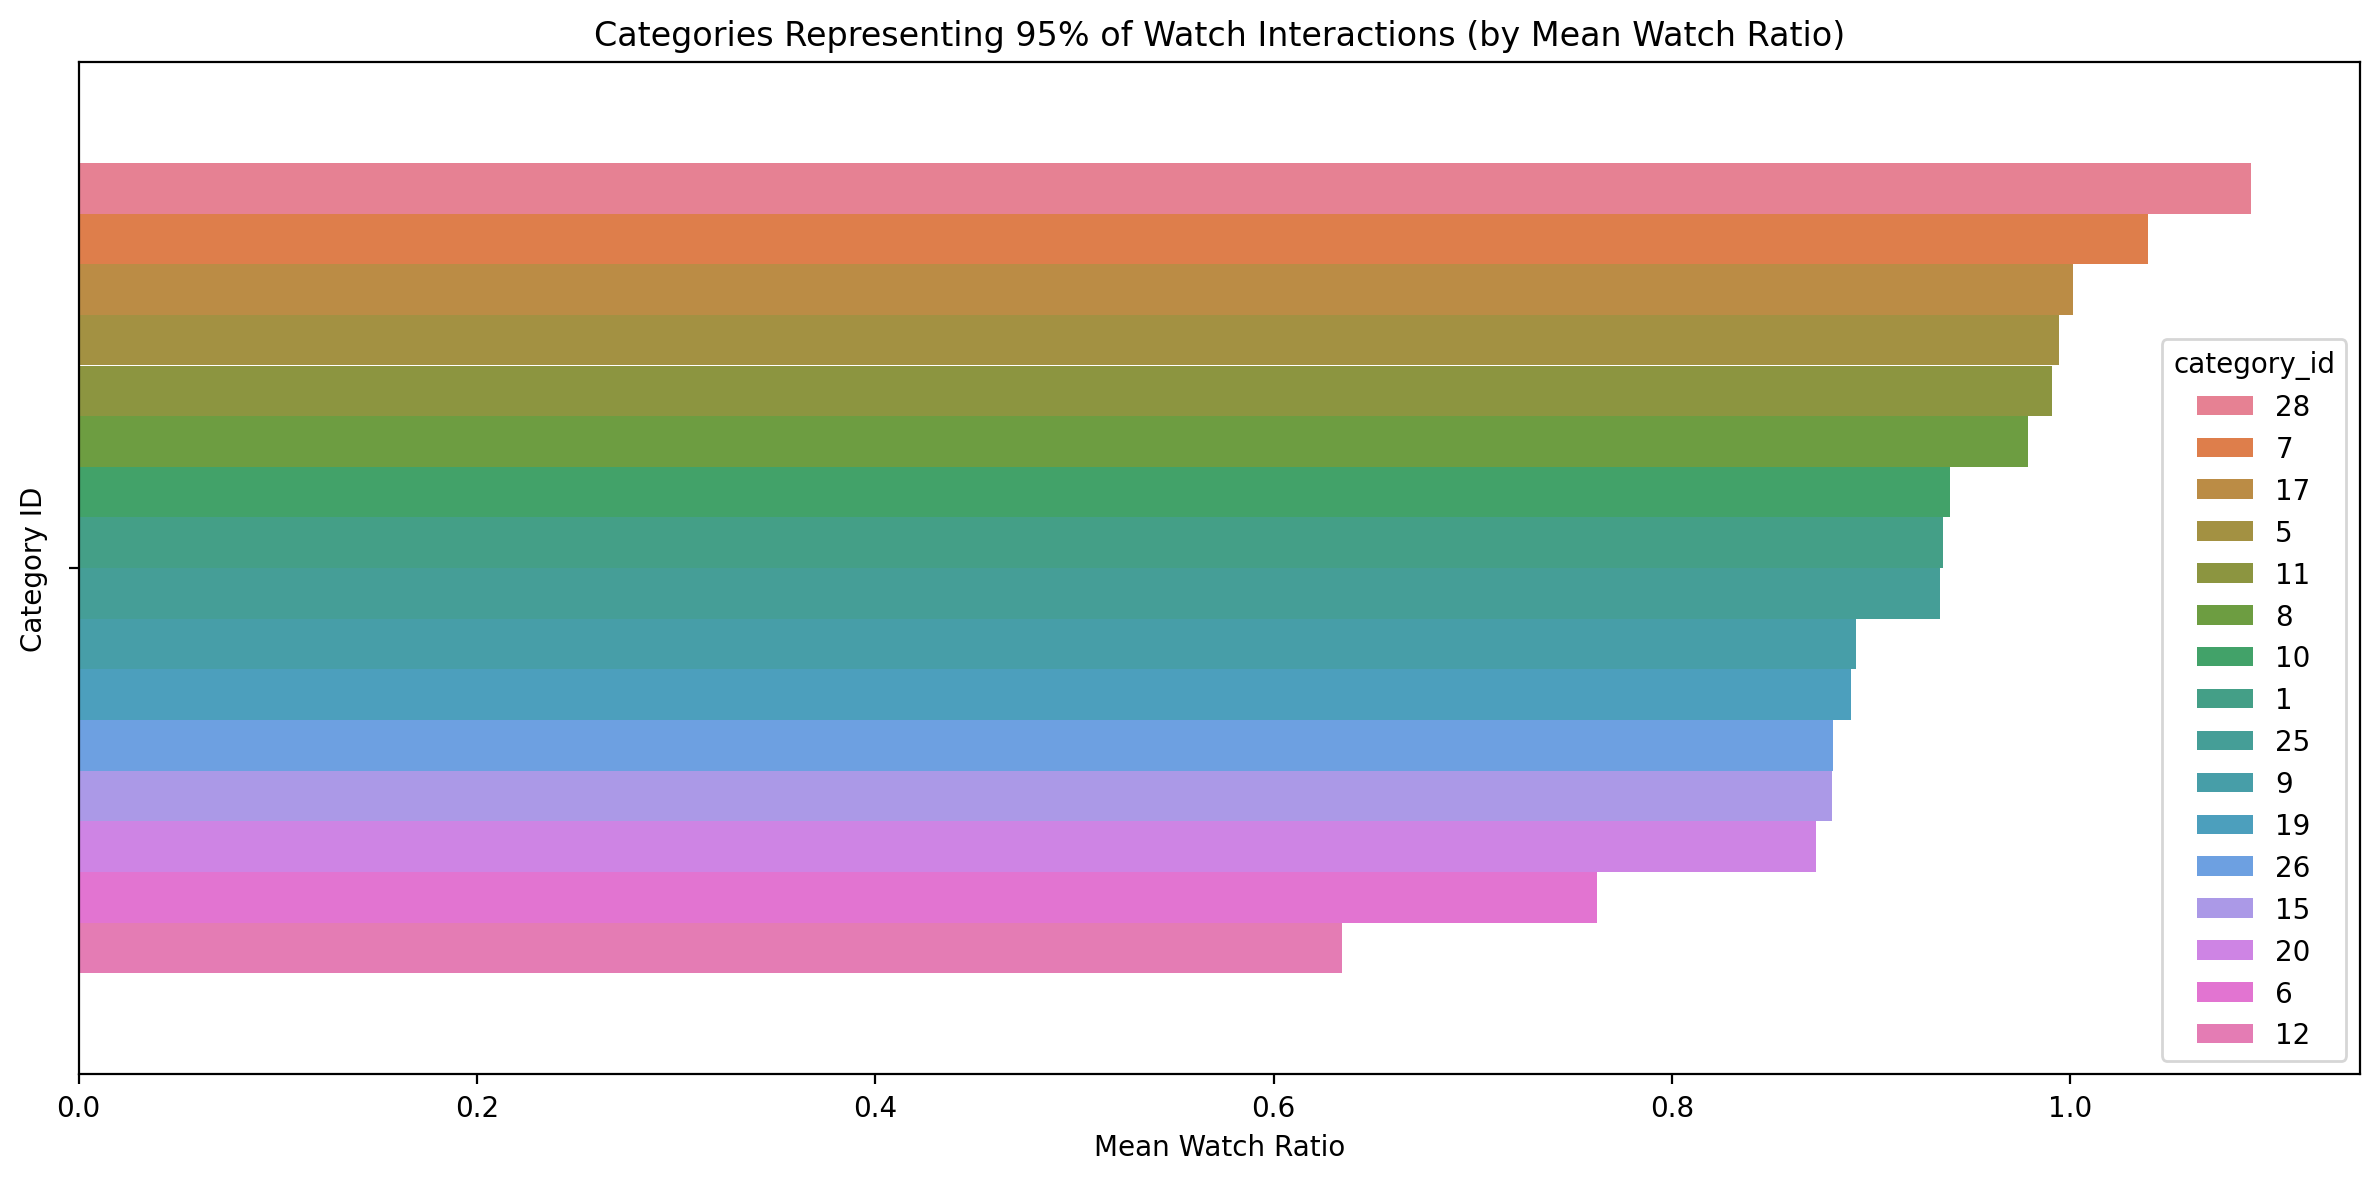

In [54]:
video_categories['feat'] = video_categories['feat'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

exploded = video_categories.explode('feat')
exploded['feat'] = exploded['feat'].astype(str)

exploded = exploded.merge(interactions_train[['video_id', 'watch_ratio']], on='video_id', how='left')

exploded = exploded.dropna(subset=['watch_ratio'])

watch_ratio_by_feat = exploded.groupby('feat').agg(
    mean_watch_ratio=('watch_ratio', 'mean'),
    count=('watch_ratio', 'count')
).reset_index()
watch_ratio_by_feat.columns = ['category_id', 'mean_watch_ratio', 'count']

watch_ratio_by_feat = watch_ratio_by_feat.sort_values(by='count', ascending=False)
watch_ratio_by_feat['cum_pct'] = watch_ratio_by_feat['count'].cumsum() / watch_ratio_by_feat['count'].sum()

top_95 = watch_ratio_by_feat[watch_ratio_by_feat['cum_pct'] <= 0.95]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_95.sort_values(by='mean_watch_ratio', ascending=False),
    x='mean_watch_ratio',
    hue='category_id',
)
plt.title('Categories Representing 95% of Watch Interactions (by Mean Watch Ratio)')
plt.xlabel('Mean Watch Ratio')
plt.ylabel('Category ID')
plt.tight_layout()
plt.show()

### Interesting category's combination having a good watch ratio

Certain combinations of categories appear to yield significantly higher watch ratios. This suggests that individual categories may not always be strong drivers of engagement, but when combined strategically, they can result in much better performance.

- For example, the combination `[0, 11, 8]` achieves a high average watch ratio of 1.75, despite having relatively few interactions (around 3000) indicating a niche but highly engaging combination.
- On the other hand, some more common combinations like `[4, 8]` receive a large number of interactions (around 15000) but show a lower average watch ratio of just 1.2, implying that popularity doesn't always correlate with viewer interest.

We can also question whether the watch_ratio alone is a sufficient metric to determine if a user actually liked a video. While it reflects how much of the video was watched, it doesn't necessarily capture user satisfaction or engagement beyond passive viewing.

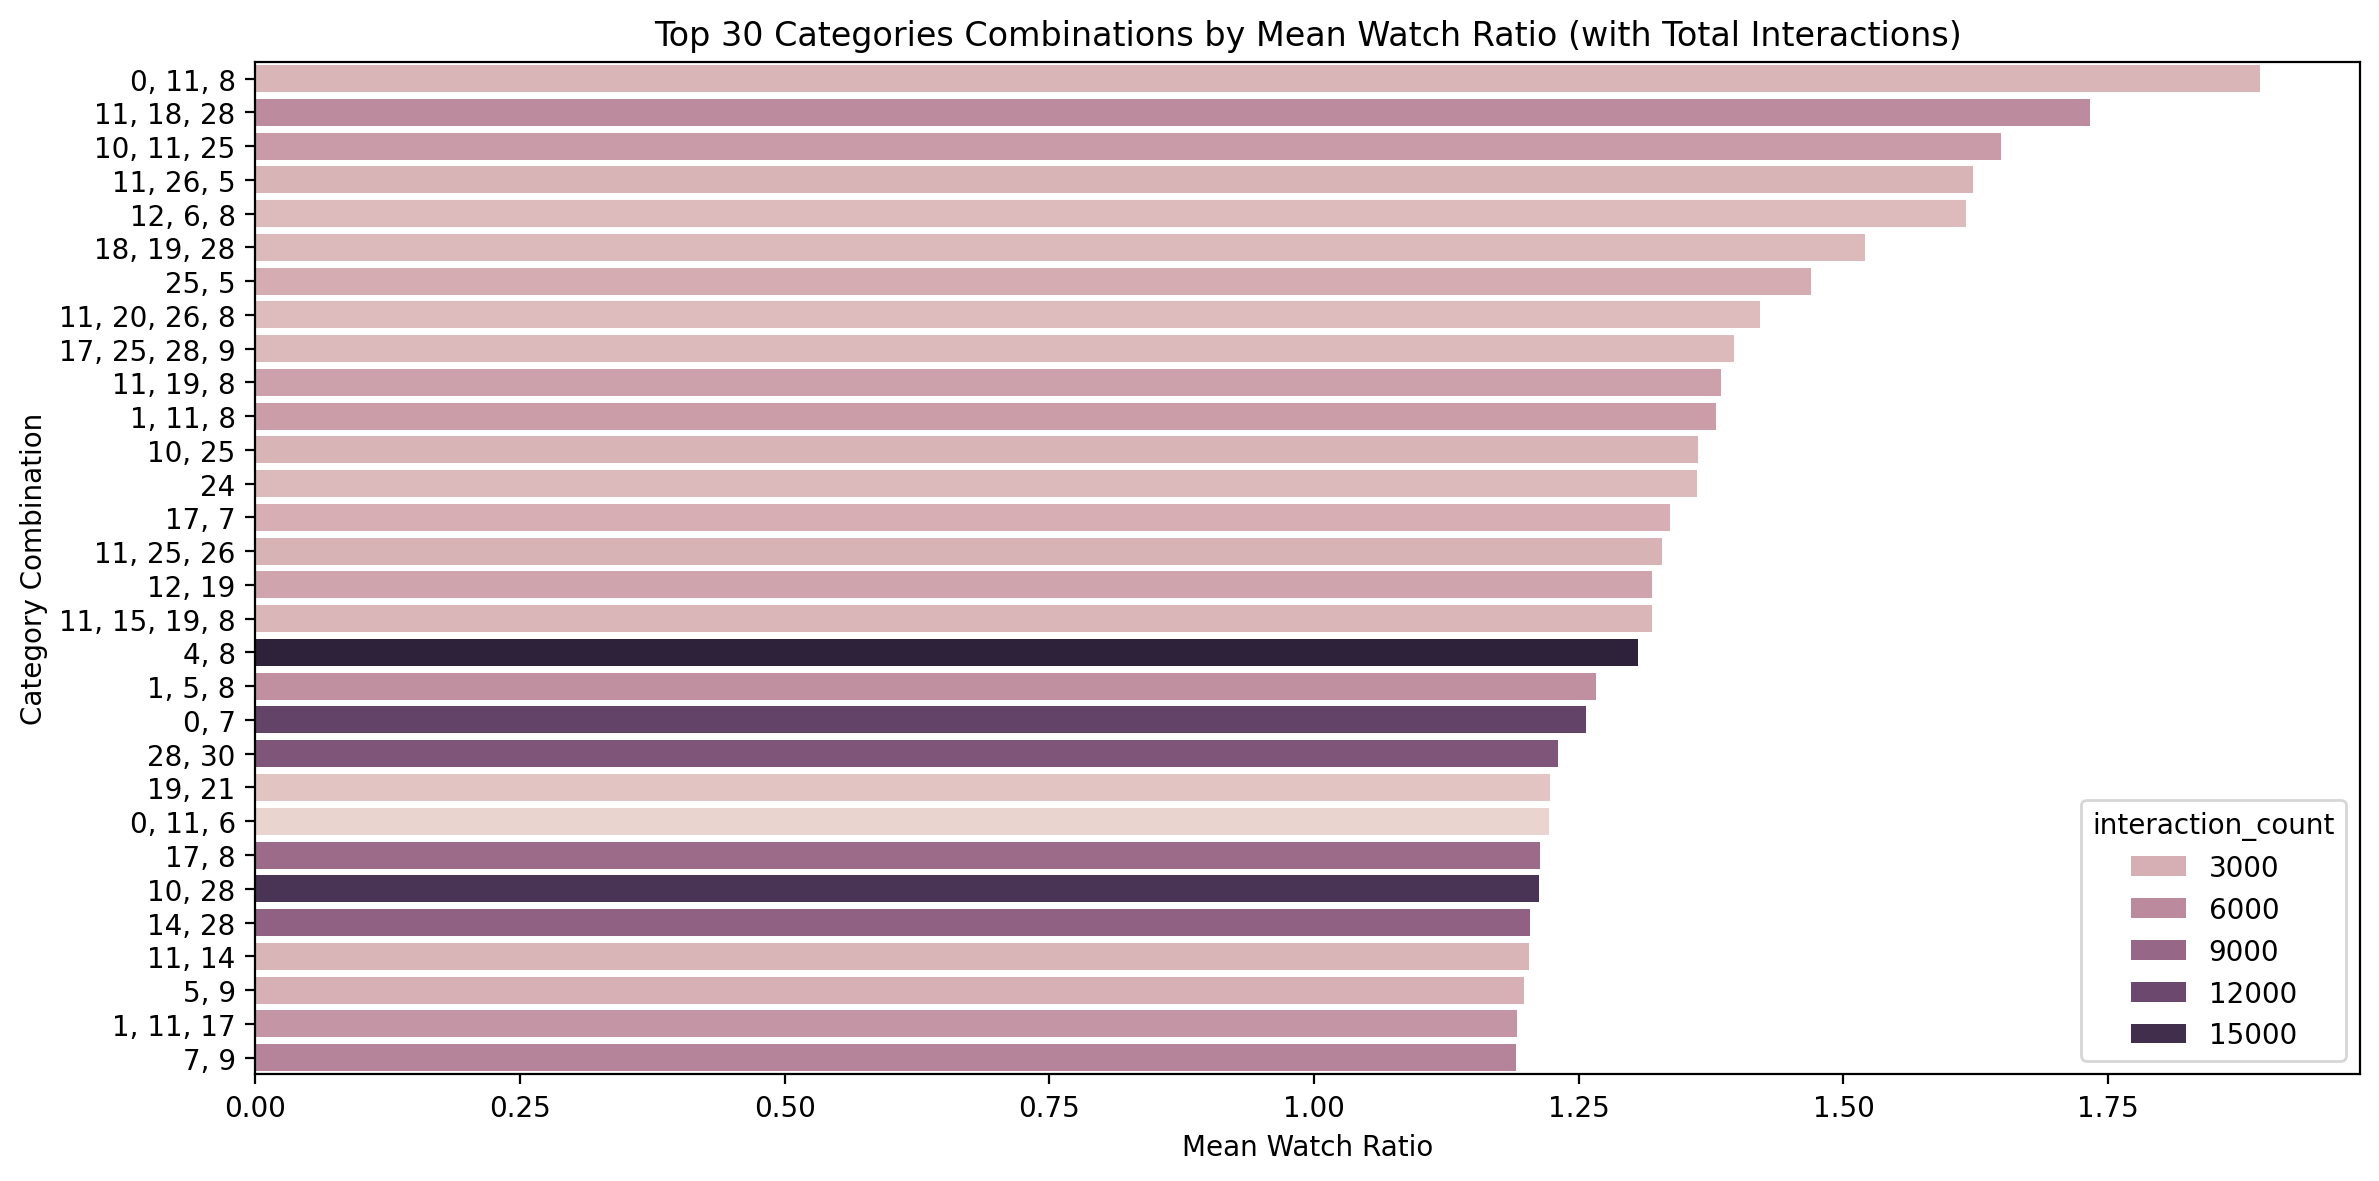

In [76]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Safely parse feat lists
video_categories['feat_sorted'] = video_categories['feat'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) \
                                                   .apply(lambda lst: ', '.join(sorted(map(str, lst))))

# Compute interaction count per video
video_stats = interactions_train.merge(video_categories[['feat_sorted', 'video_id']], on='video_id').groupby('feat_sorted').agg(
    interaction_count=('watch_ratio', 'count'),
    mean_watch_ratio=('watch_ratio', 'mean')
).reset_index()

# Get top 30 by mean_watch_ratio
top_combinations = video_stats.sort_values(by='mean_watch_ratio', ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_combinations,
    x='mean_watch_ratio',
    y='feat_sorted',
    hue='interaction_count',
    legend=True
)

plt.title('Top 30 Categories Combinations by Mean Watch Ratio (with Total Interactions)')
plt.xlabel('Mean Watch Ratio')
plt.ylabel('Category Combination')
plt.tight_layout()
plt.show()

## Video Daily Features

This dataset contains daily interactions on the video.

This may be useful when we'll consider **video characterstics on a daily basis** or to **create a more long term feature**.

### Imports

In [36]:
video_daily = pd.read_csv("../data_final_project/KuaiRec 2.0/data/item_daily_features.csv")
video_daily.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


### Generic (Missing values, types, size)

In [37]:
video_daily.describe()

,video_id,date,author_id,video_duration,video_width,video_height,music_id,video_tag_id,show_cnt,show_user_num,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
count,343341.000000,3.433410e+05,343341.000000,332743.000000,343341.000000,343341.000000,3.433410e+05,343341.000000,3.433410e+05,3.433410e+05,...,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,273658.000000,273658.000000,273658.000000,273658.000000
mean,5077.370157,2.020080e+07,4220.959932,12508.367091,713.117833,1218.797452,3.041715e+09,1363.171585,9.424580e+04,8.859975e+04,...,44.557484,39.704049,0.042780,0.037549,50.422289,48.942605,20.014686,19.837754,1.320338,1.297514
std,3113.616949,5.654698e+01,2390.317222,13904.816578,122.673938,165.715482,1.543376e+09,1090.364659,5.761700e+05,5.512458e+05,...,535.575910,471.296386,0.822401,0.695511,281.581431,273.243597,356.678666,353.742019,7.581929,7.364914
min,0.000000,2.020070e+07,0.000000,40.000000,270.000000,320.000000,0.000000e+00,-124.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2318.000000,2.020073e+07,2126.000000,6901.000000,720.000000,1280.000000,2.354487e+09,144.000000,5.500000e+01,4.700000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5235.000000,2.020081e+07,4402.000000,9466.000000,720.000000,1280.000000,3.921367e+09,1099.000000,1.328000e+03,1.126000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7725.000000,2.020083e+07,6293.000000,12241.000000,720.000000,1280.000000,4.098158e+09,2491.000000,2.419000e+04,2.161600e+04,...,3.000000,3.000000,0.000000,0.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000
max,10727.000000,2.020090e+07,8369.000000,315040.000000,3024.000000,3024.000000,4.431044e+09,2891.000000,4.218154e+07,3.893533e+07,...,134099.000000,133802.000000,198.000000,176.000000,34454.000000,33720.000000,116971.000000,115859.000000,2056.000000,1971.000000


In [38]:
video_daily.info()
video_daily.describe()
video_daily.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343341 entries, 0 to 343340
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   video_id                  343341 non-null  int64  
 1   date                      343341 non-null  int64  
 2   author_id                 343341 non-null  int64  
 3   video_type                343341 non-null  object 
 4   upload_dt                 343341 non-null  object 
 5   upload_type               343341 non-null  object 
 6   visible_status            343341 non-null  object 
 7   video_duration            332743 non-null  float64
 8   video_width               343341 non-null  int64  
 9   video_height              343341 non-null  int64  
 10  music_id                  343341 non-null  int64  
 11  video_tag_id              343341 non-null  int64  
 12  video_tag_name            310907 non-null  object 
 13  show_cnt                  343341 non-null  i

video_id                        0
date                            0
author_id                       0
video_type                      0
upload_dt                       0
upload_type                     0
visible_status                  0
video_duration              10598
video_width                     0
video_height                    0
music_id                        0
video_tag_id                    0
video_tag_name              32434
show_cnt                        0
show_user_num                   0
play_cnt                        0
play_user_num                   0
play_duration                   0
complete_play_cnt               0
complete_play_user_num          0
valid_play_cnt                  0
valid_play_user_num             0
long_time_play_cnt              0
long_time_play_user_num         0
short_time_play_cnt             0
short_time_play_user_num        0
play_progress                   0
comment_stay_duration           0
like_cnt                        0
like_user_num 

### Dtypes & Feature Engineering

In [42]:
video_daily.columns

Index(['video_id', 'date', 'author_id', 'video_type', 'upload_dt',
       'upload_type', 'visible_status', 'video_duration', 'music_id',
       'video_tag_id', 'video_tag_name', 'show_cnt', 'show_user_num',
       'play_cnt', 'play_duration', 'valid_play_cnt', 'valid_play_user_num',
       'short_time_play_cnt', 'play_progress', 'comment_stay_duration',
       'like_cnt', 'like_user_num', 'click_like_cnt', 'double_click_cnt',
       'cancel_like_cnt', 'cancel_like_user_num', 'comment_cnt',
       'direct_comment_cnt', 'reply_comment_cnt', 'delete_comment_cnt',
       'delete_comment_user_num', 'comment_like_cnt', 'comment_like_user_num',
       'follow_cnt', 'follow_user_num', 'cancel_follow_cnt',
       'cancel_follow_user_num', 'share_cnt', 'share_user_num', 'download_cnt',
       'download_user_num', 'report_cnt', 'report_user_num',
       'reduce_similar_cnt', 'reduce_similar_user_num', 'rewatch_rate',
       'aspect_ratio', 'video_age'],
      dtype='object')

In [41]:
video_daily['upload_dt'] = pd.to_datetime(video_daily['upload_dt'], errors='coerce')
video_daily['date'] = pd.to_datetime(video_daily['date'].astype(str), format='%Y%m%d')
video_daily['date'] = pd.to_datetime(video_daily['date'], errors='coerce')

video_daily['rewatch_rate'] = video_daily['play_cnt'] / video_daily['play_user_num']
#video_daily['cancel_like_rate'] = (video_daily['like_cnt'] / video_daily['like_user_num']) / (video_daily['cancel_like_cnt'] / video_daily['cancel_like_user_num'])
video_daily['aspect_ratio'] = video_daily['video_width'] / video_daily['video_height']
video_daily['video_age'] = (video_daily['date'] - video_daily['upload_dt']).dt.days

video_daily.drop(columns=[
    'play_user_num', 'comment_user_num', 'complete_play_cnt', 'complete_play_user_num',
    'video_width', 'video_height',
    'collect_cnt', 'collect_user_num', 'cancel_collect_cnt', 'cancel_collect_user_num', # for simplicity we drop those
    'long_time_play_cnt', 'long_time_play_user_num', 'short_time_play_user_num'
], inplace=True)

In [ ]:
video_daily.columns

### Correlation between watch rate and categorical features

#### Raw Counts

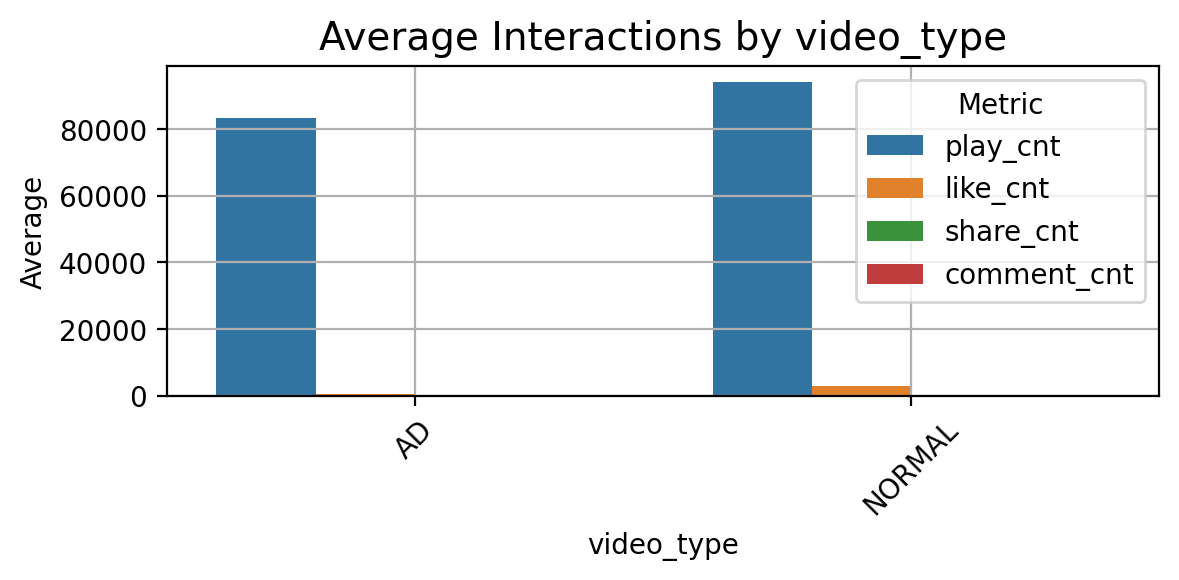

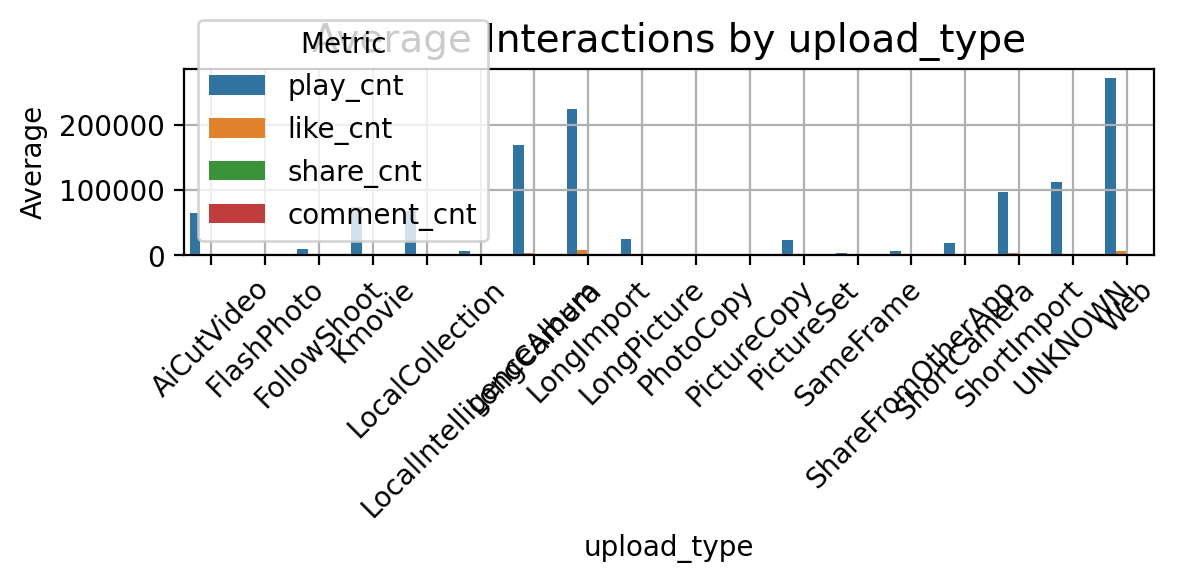

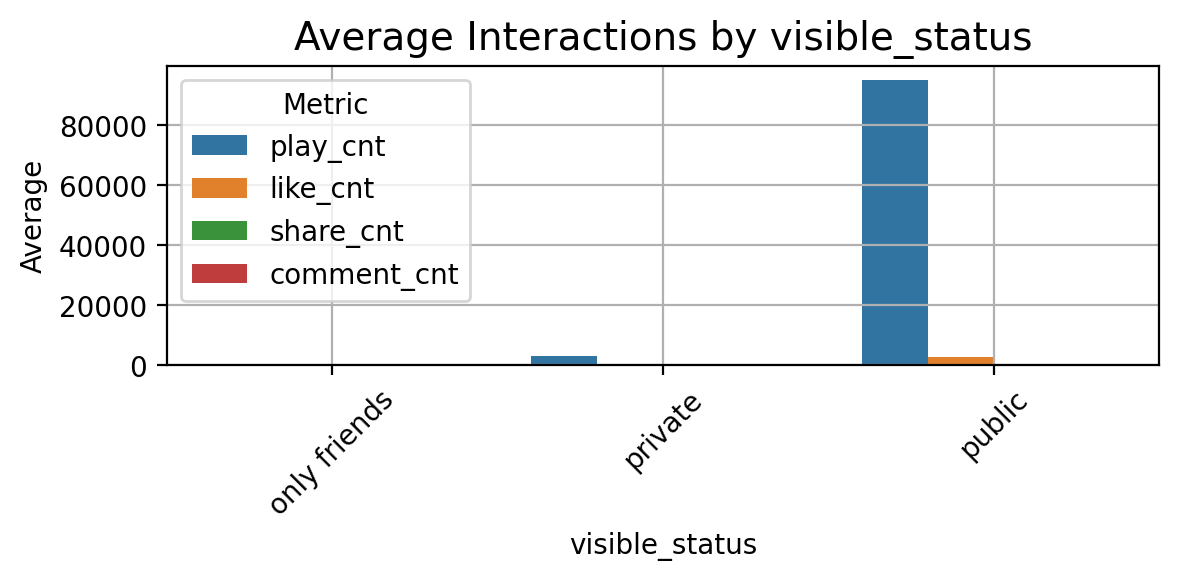

In [166]:
# Define metrics and categorical columns
metrics = ['play_cnt', 'like_cnt', 'share_cnt', 'comment_cnt']
categoricals = ['video_type', 'upload_type', 'visible_status']

for cat in categoricals:
    grouped = video_daily.groupby(cat)[metrics].mean().reset_index().melt(id_vars=cat, var_name='Metric', value_name='Average')
    plt.figure(figsize=(6, 3))
    sns.barplot(data=grouped, x=cat, y='Average', hue='Metric')
    plt.title(f'Average Interactions by {cat}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

#### By Rewatch ratio

Rewatch ratio proves to be a more meaningful engagement metric than raw counts. It reveals several interesting patterns:
- Normal videos tend to be rewatched more often than advertisements, indicating higher viewer interest or replay value.
- Private and friends-only videos shows higher rewatch rates compared to public videos.
- Videos with the "SameFrame" upload type show significantly higher rewatch ratios. In contrast, other upload types typically fall between 1.0 and 1.2, indicating less frequent replays.
- The aspect ratio of a video does not appear to influence rewatch behavior in any meaningful way.

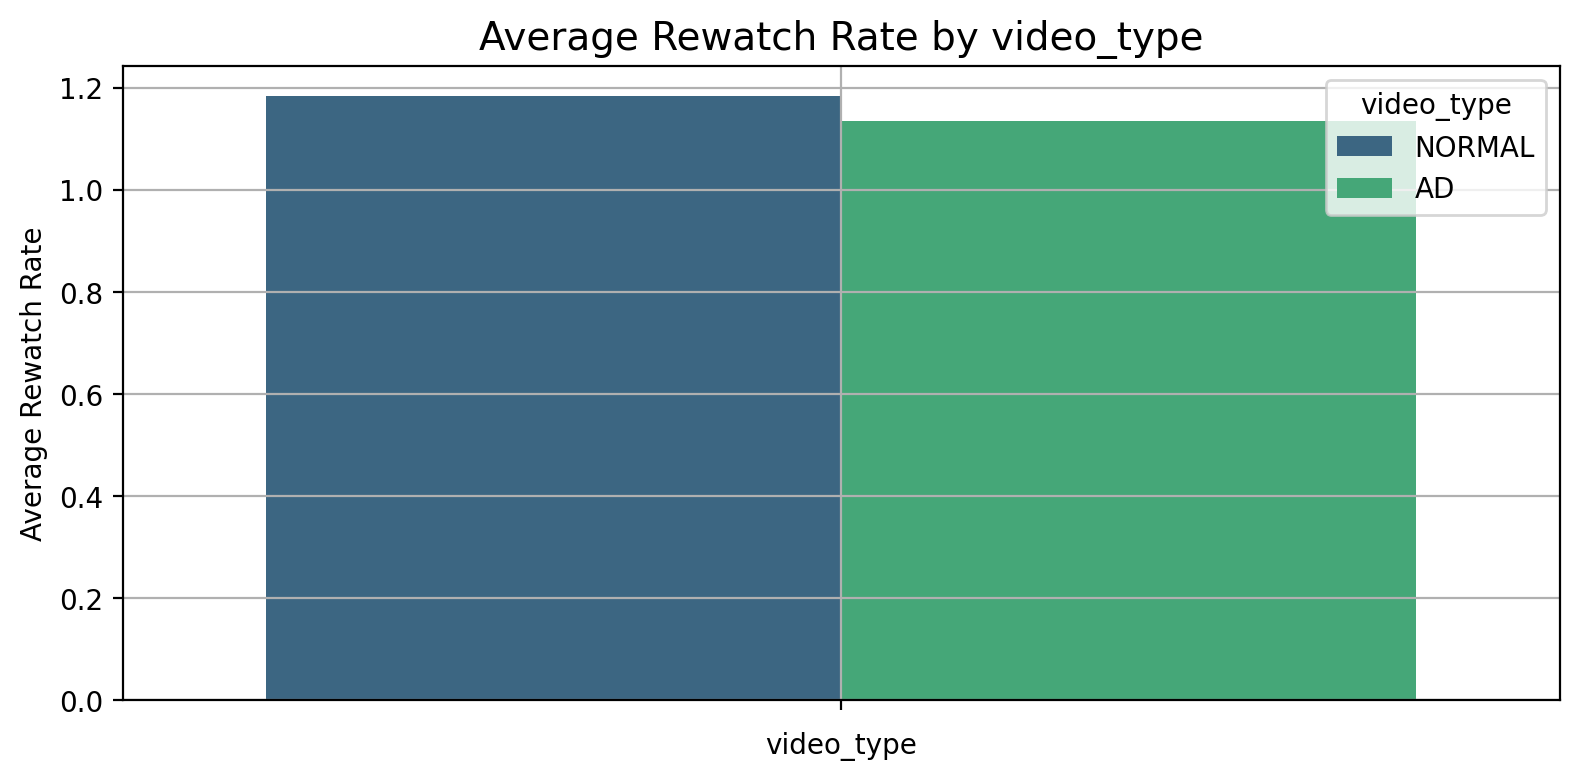

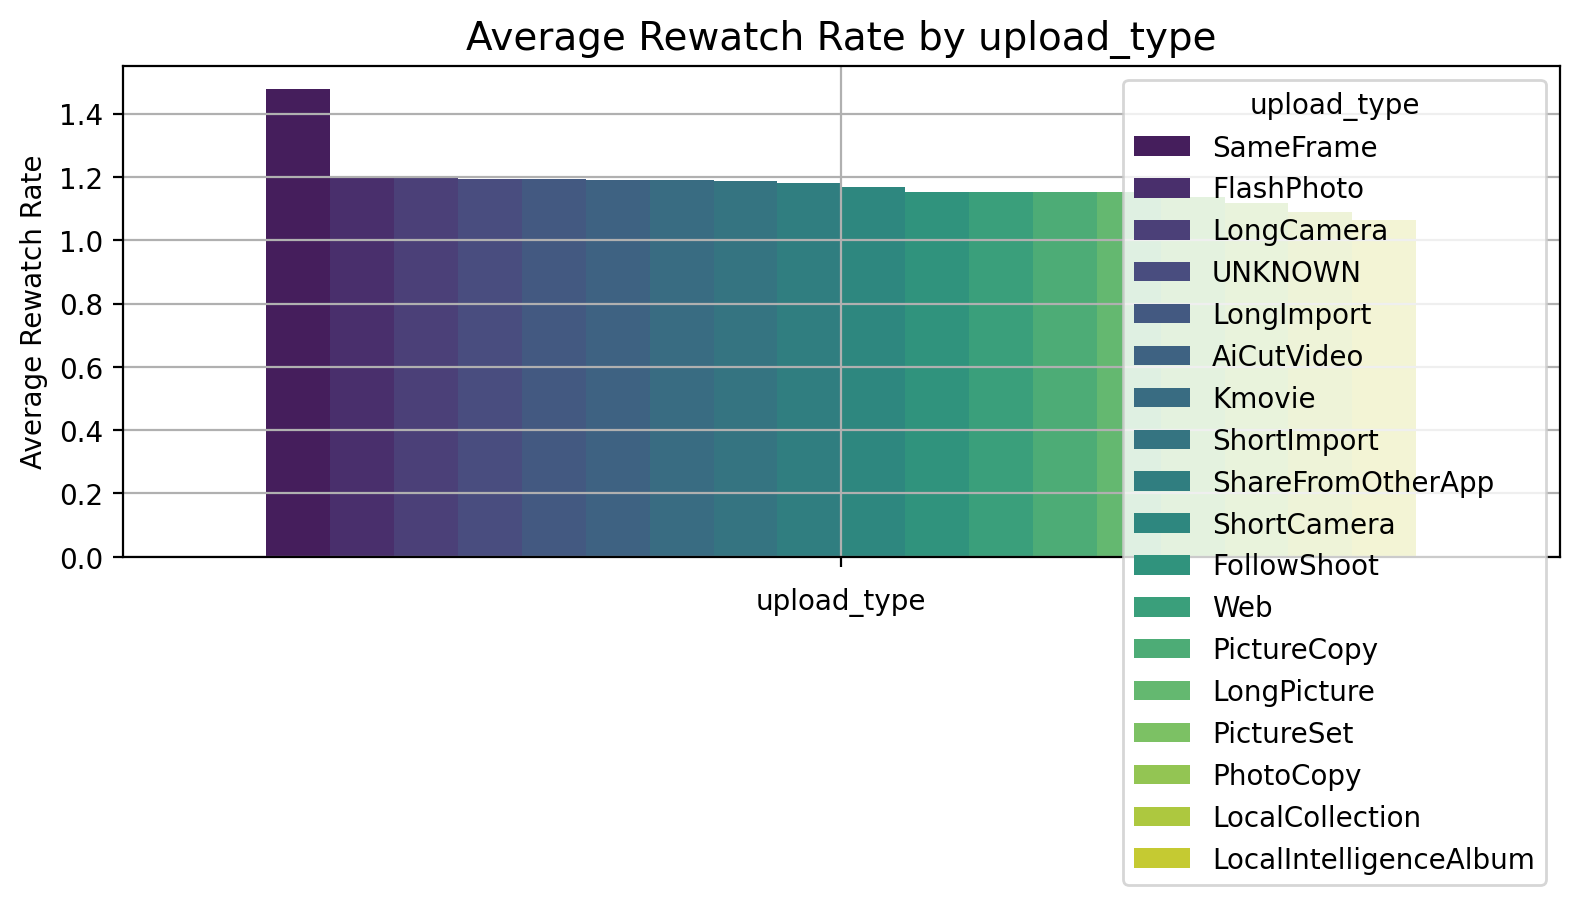

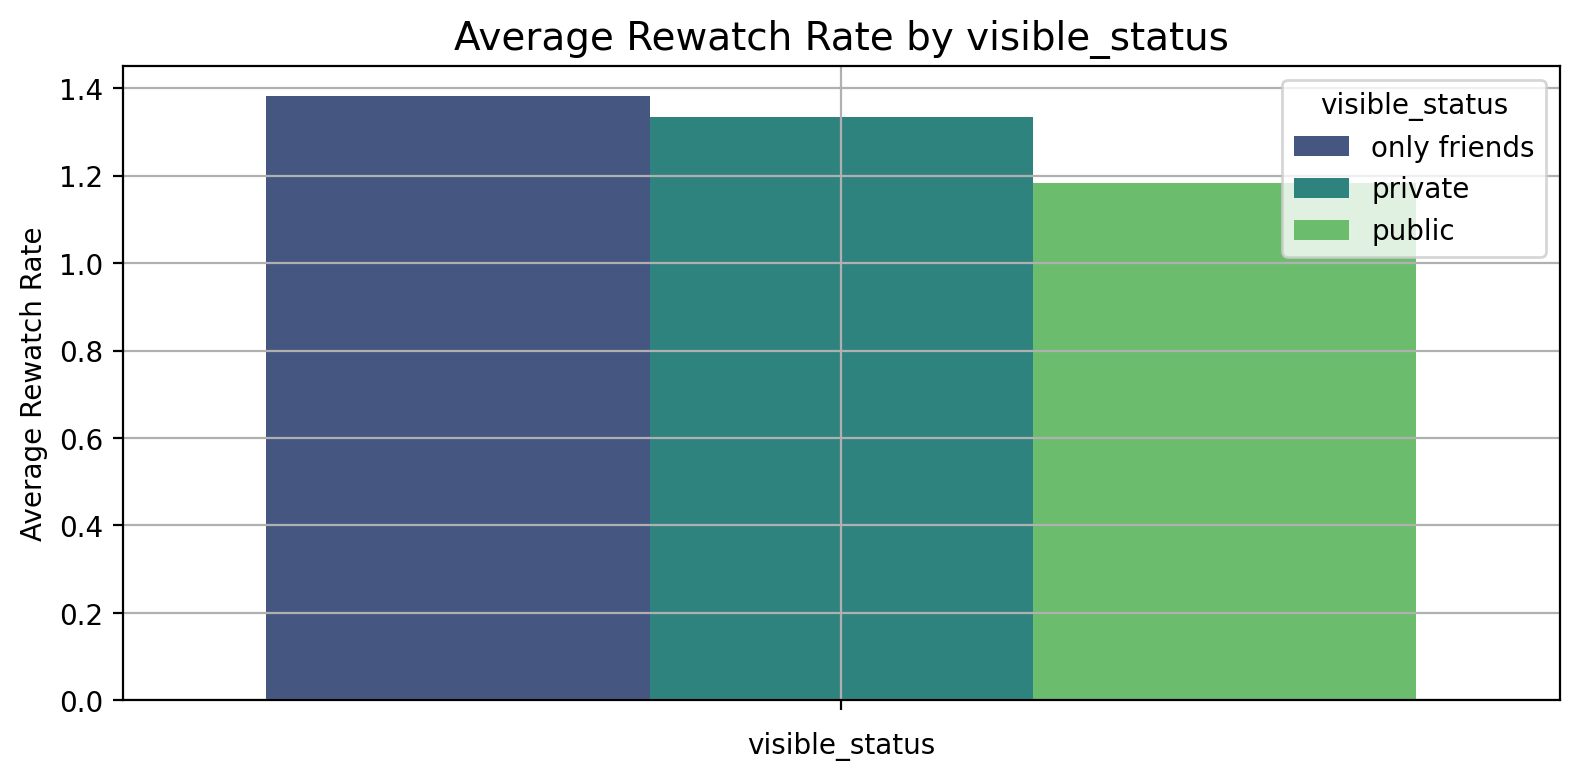

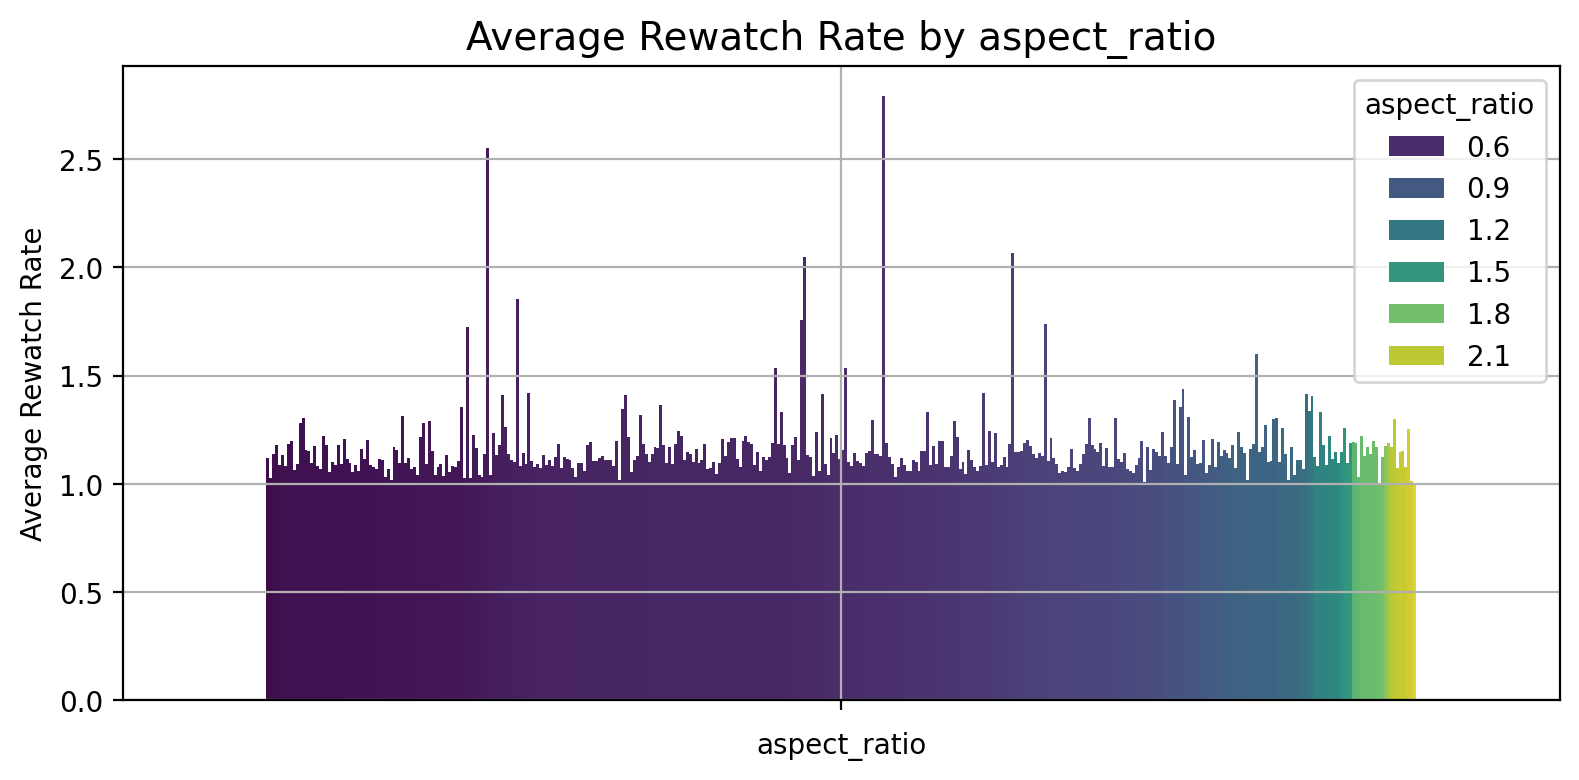

In [168]:
categoricals = ['video_type', 'upload_type', 'visible_status', 'aspect_ratio']

for cat in categoricals:
    grouped = video_daily.groupby(cat)['rewatch_rate'].mean().reset_index().sort_values('rewatch_rate', ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(data=grouped, hue=cat, y='rewatch_rate', palette='viridis')
    plt.title(f'Average Rewatch Rate by {cat}', fontsize=14)
    plt.ylabel('Average Rewatch Rate')
    plt.xlabel(cat)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

### Video Reports vs Watch Ratio

The number of reports generally decreases across videos, but those with more than 30 reports tend to show higher watch ratio compared to others.

This suggests that report count may be a valuable metric worth exploring further.

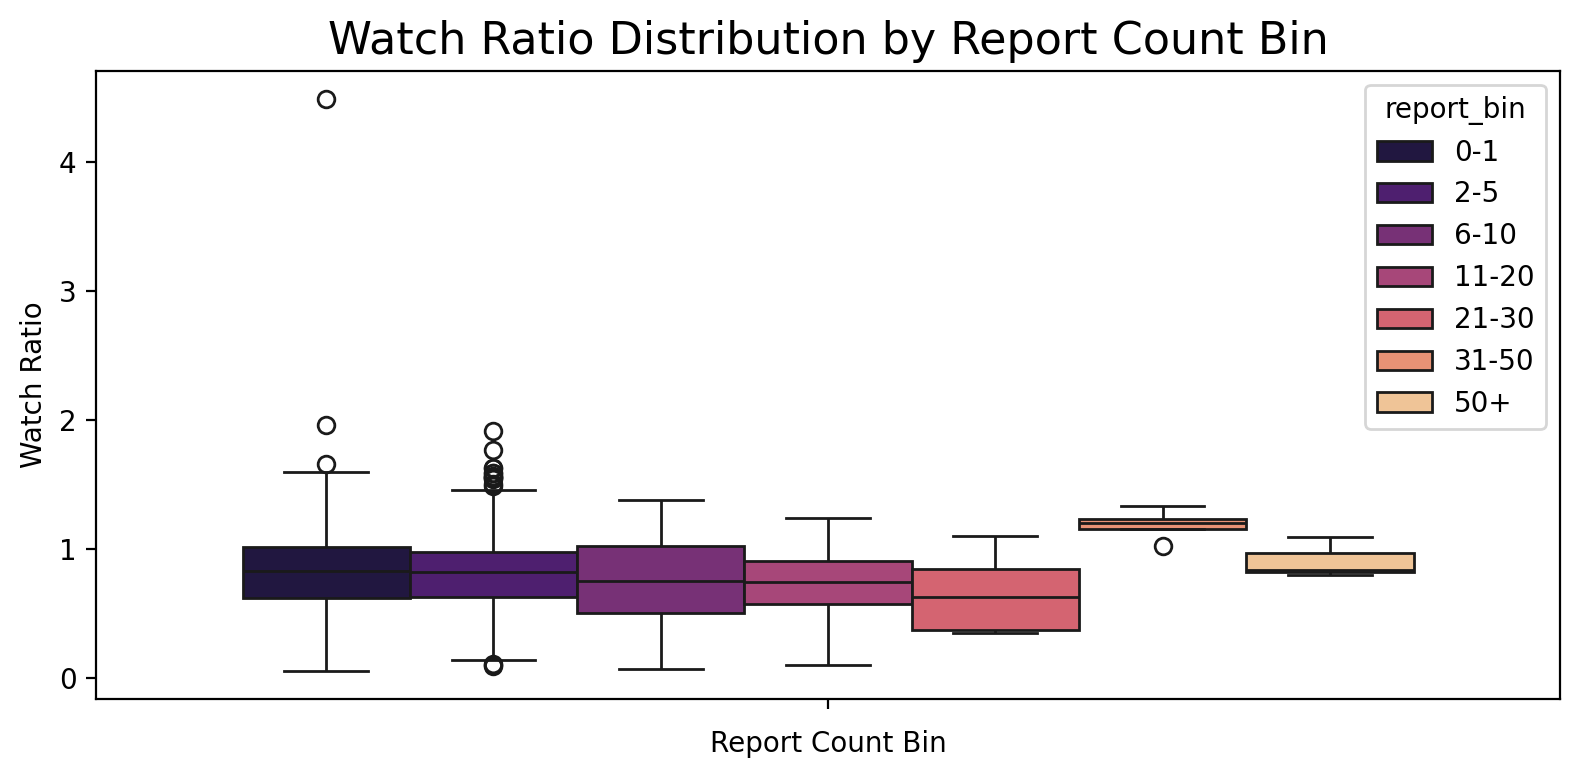

In [59]:
video_metrics = (
    interactions_train[['video_id', 'watch_ratio']]
    .groupby('video_id')
    .mean()
    .reset_index()exploit
    .merge(
        video_daily.drop_duplicates(subset=['video_id'], keep='first')[['video_id', 'video_duration', 'report_cnt']],
        on='video_id',
        how='left'
    )
)

# Define bins and labels properly
bins = [0, 1, 5, 10, 20, 30, 50, video_metrics['report_cnt'].max()]
labels = ['0-1', '2-5', '6-10', '11-20', '21-30', '31-50', '50+']

video_metrics['report_bin'] = pd.cut(
    video_metrics['report_cnt'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)


plt.figure(figsize=(8, 4))
sns.boxplot(
    data=video_metrics[video_metrics['report_cnt'] > 0],
    hue='report_bin',
    y='watch_ratio',
    palette='magma'
)
plt.title('Watch Ratio Distribution by Report Count Bin', fontsize=16)
plt.xlabel('Report Count Bin')
plt.ylabel('Watch Ratio')
plt.tight_layout()
plt.show()

### Video Duration vs Watch Ratio

Shorter videos generally exhibit higher watch ratios compared to longer videos.

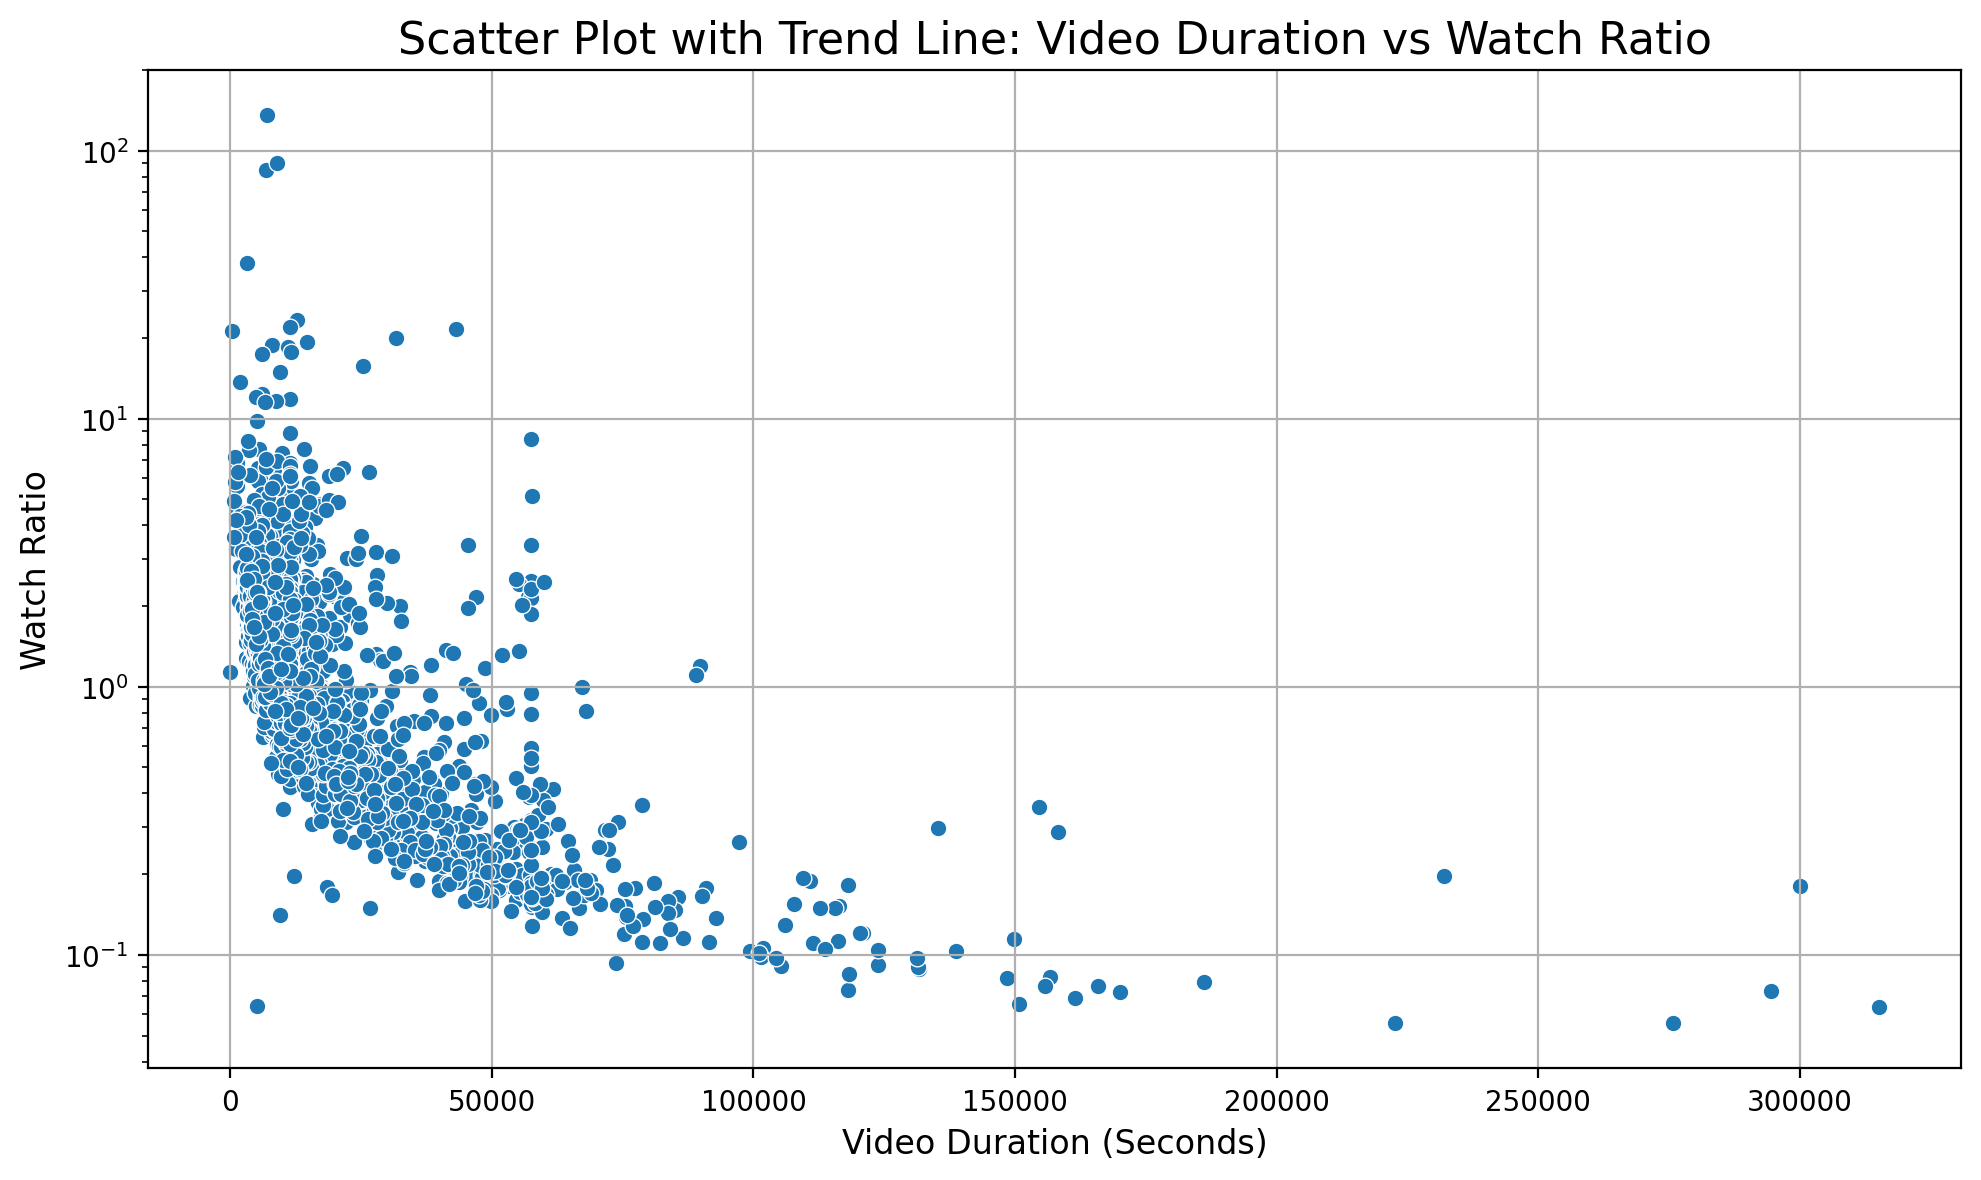

In [10]:
# Merge data
merged_data = interactions_train[['video_id', 'watch_ratio']].groupby('video_id').mean().reset_index().merge(
    video_daily.drop_duplicates(subset=['video_id', 'video_duration'], keep='first')[['video_id', 'video_duration']], 
    on='video_id', how='left'
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='video_duration', y='watch_ratio')

plt.title('Scatter Plot with Trend Line: Video Duration vs Watch Ratio', fontsize=16)
plt.xlabel('Video Duration (Seconds)', fontsize=12)
plt.ylabel('Watch Ratio', fontsize=12)
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.show()

### Video Lifespan

Comments & Shares:
- As videos gets older, there are less and less comments and shares with an inversly exponential trend

Likes & Plays:
- We cannot detect any specific trend. There is a weird

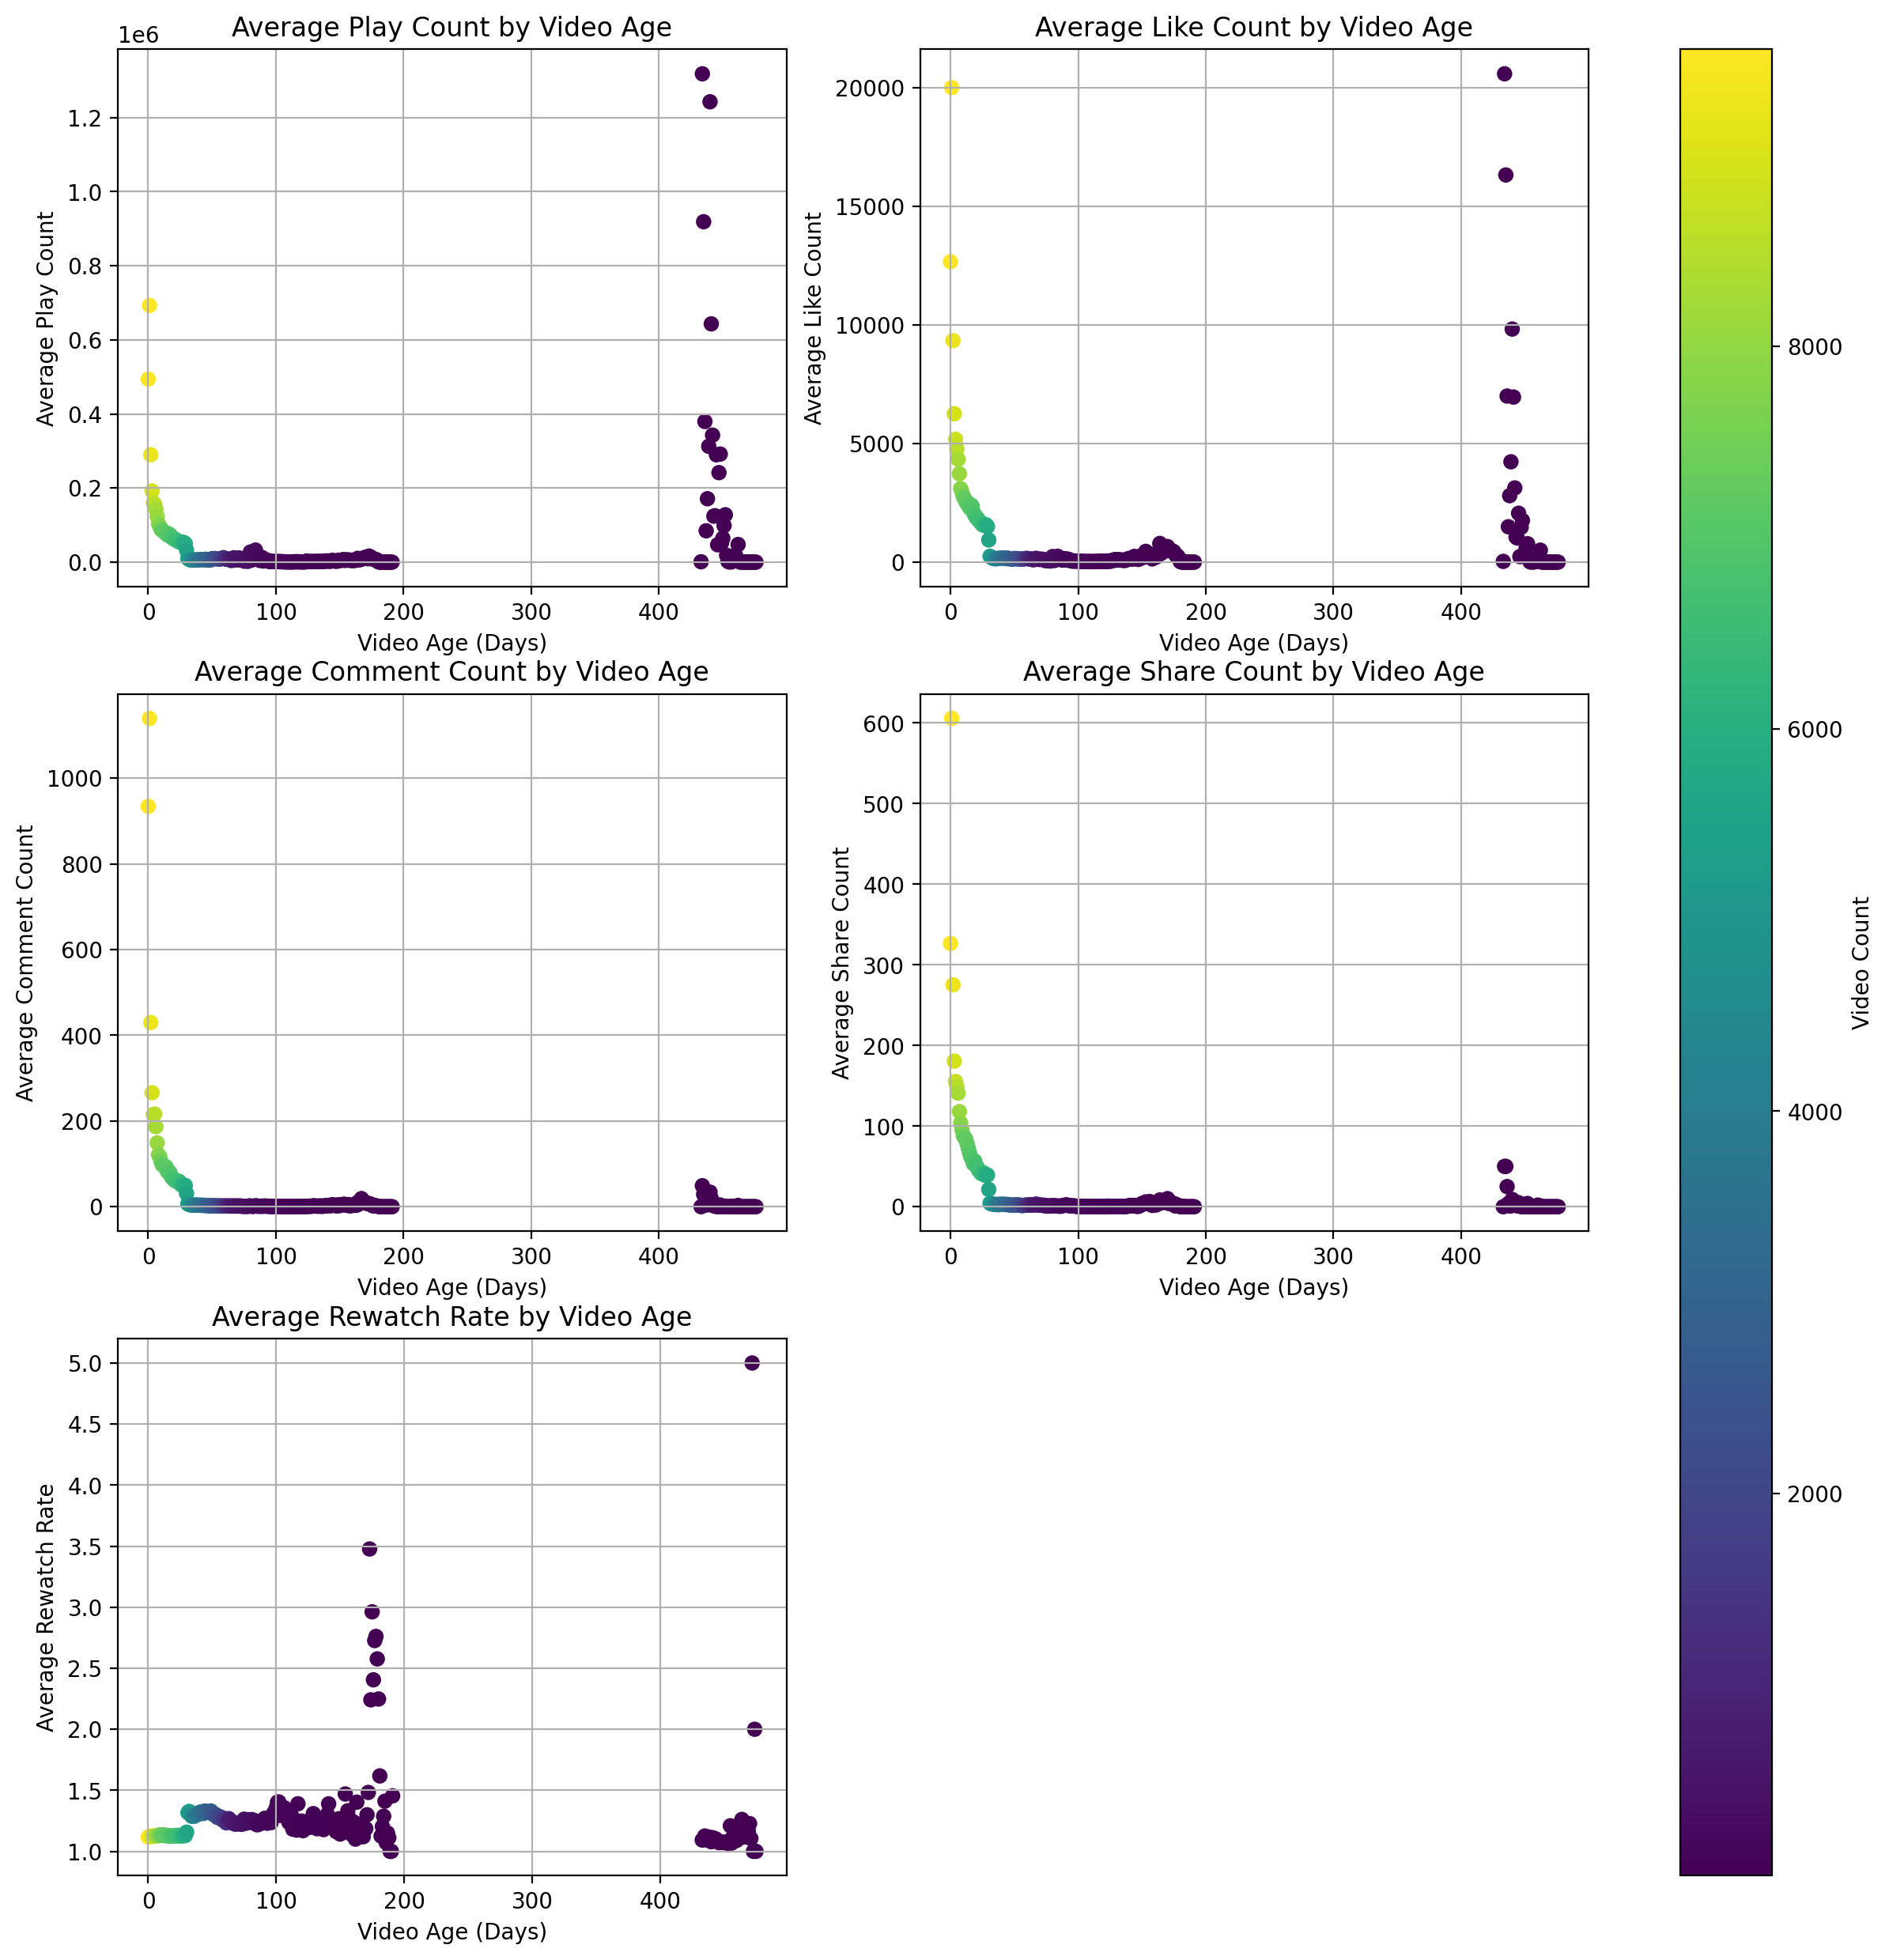

In [29]:
age_groups = video_daily.groupby('video_age')[['play_cnt', 'like_cnt', 'comment_cnt', 'share_cnt', 'rewatch_rate', 'click_like_cnt', 'video_id']].agg(
    mean_play_cnt=('play_cnt', 'mean'),
    mean_like_cnt=('like_cnt', 'mean'),
    mean_comment_cnt=('comment_cnt', 'mean'),
    mean_share_cnt=('share_cnt', 'mean'),
    mean_rewatch_rate=('rewatch_rate', 'mean'),
    meanclick_like_cnt=('click_like_cnt', 'mean'),
    video_count=('video_id', 'nunique')  # Counting unique video_id for each video_age group
).reset_index().dropna(subset=['video_age', 'video_count'])

# Plot each metric on independent subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
norm = mcolors.Normalize(vmin=age_groups['video_count'].min(), vmax=age_groups['video_count'].max())
cmap = plt.get_cmap('viridis')

# Plot Play Count
scatter = axes[0, 0].scatter(age_groups['video_age'], age_groups['mean_play_cnt'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[0, 0].set_title('Average Play Count by Video Age')
axes[0, 0].set_xlabel('Video Age (Days)')
axes[0, 0].set_ylabel('Average Play Count')
axes[0, 0].grid(True)

# Plot Like Count
scatter = axes[0, 1].scatter(age_groups['video_age'], age_groups['mean_like_cnt'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[0, 1].set_title('Average Like Count by Video Age')
axes[0, 1].set_xlabel('Video Age (Days)')
axes[0, 1].set_ylabel('Average Like Count')
axes[0, 1].grid(True)

# Plot Comment Count
#sns.lineplot(data=age_groups, x='video_age', y='mean_comment_cnt', marker='o', ax=axes[1, 0], color='r')
scatter = axes[1, 0].scatter(age_groups['video_age'], age_groups['mean_comment_cnt'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[1, 0].set_title('Average Comment Count by Video Age')
axes[1, 0].set_xlabel('Video Age (Days)')
axes[1, 0].set_ylabel('Average Comment Count')
axes[1, 0].grid(True)

# Plot Share Count
scatter = axes[1, 1].scatter(age_groups['video_age'], age_groups['mean_share_cnt'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[1, 1].set_title('Average Share Count by Video Age')
axes[1, 1].set_xlabel('Video Age (Days)')
axes[1, 1].set_ylabel('Average Share Count')
axes[1, 1].grid(True)

# Plot Rewatch Rate
scatter = axes[2, 0].scatter(age_groups['video_age'], age_groups['mean_rewatch_rate'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[2, 0].set_title('Average Rewatch Rate by Video Age')
axes[2, 0].set_xlabel('Video Age (Days)')
axes[2, 0].set_ylabel('Average Rewatch Rate')
axes[2, 0].grid(True)

scatter = axes[2, 0].scatter(age_groups['video_age'], age_groups['mean_click_like_cnt'], c=age_groups['video_count'], cmap=cmap, norm=norm)
axes[2, 1].set_title('Average Rewatch Rate by Video Age')
axes[2, 1].set_xlabel('Video Age (Days)')
axes[2, 1].set_ylabel('Average Rewatch Rate')
axes[2, 1].grid(True)

fig.colorbar(scatter, ax=axes, orientation='vertical', label='Video Count')
plt.show()

### Metric correlation

#### Like, Share, Play and Comment Correlation

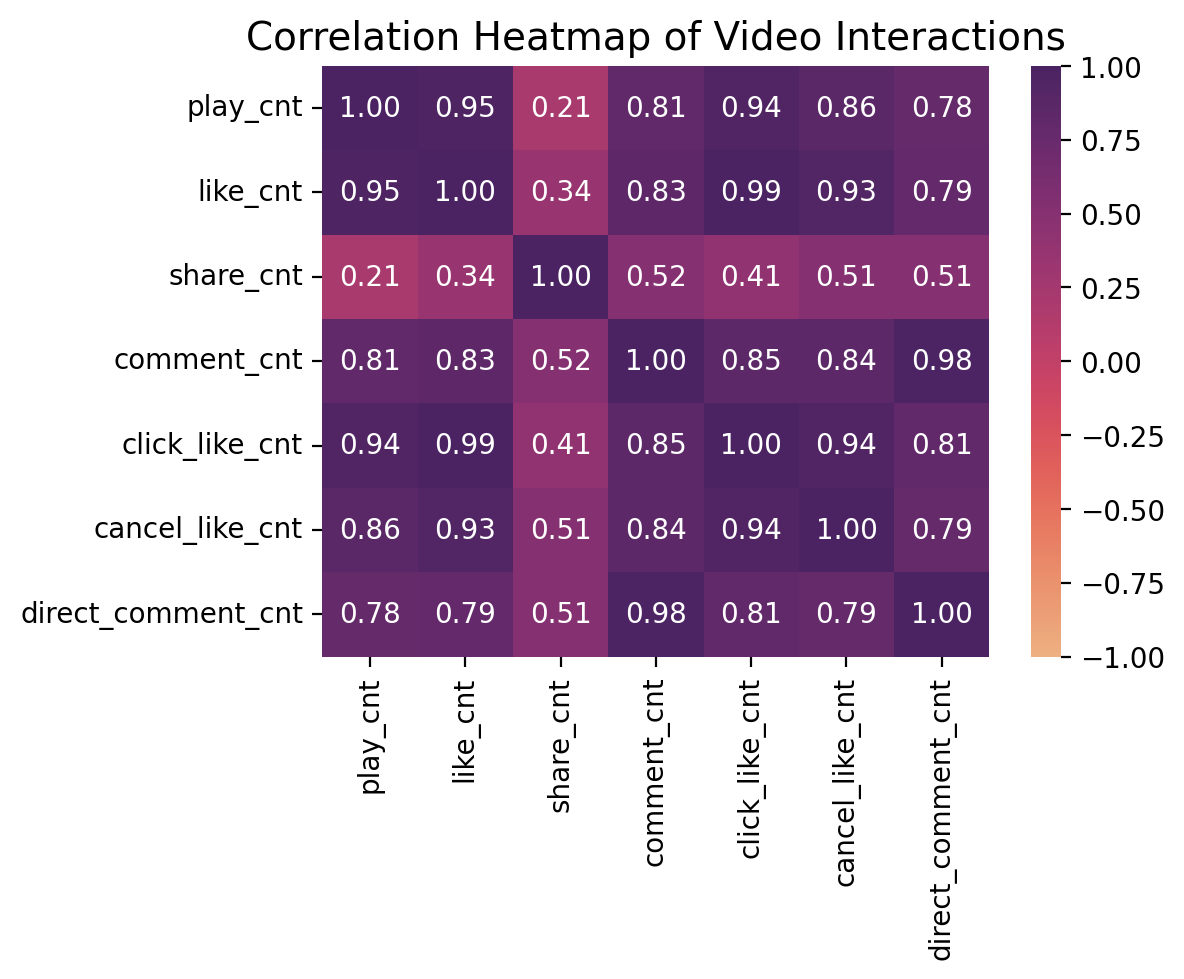

In [35]:
video_daily_stats = video_daily[
    ['date', 'video_id', 'play_cnt', 'like_cnt', 'share_cnt', 'comment_cnt', 'click_like_cnt', 'cancel_like_cnt', 'direct_comment_cnt']
].groupby(['date']).sum()
interaction_metrics = video_daily_stats[['play_cnt', 'like_cnt', 'share_cnt', 'comment_cnt', 'click_like_cnt', 'cancel_like_cnt', 'direct_comment_cnt']]
corr_matrix = interaction_metrics.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="flare", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Video Interactions", fontsize=14)
plt.tight_layout()
plt.show()

#### Global Trends of metrics

### Temporal Trends

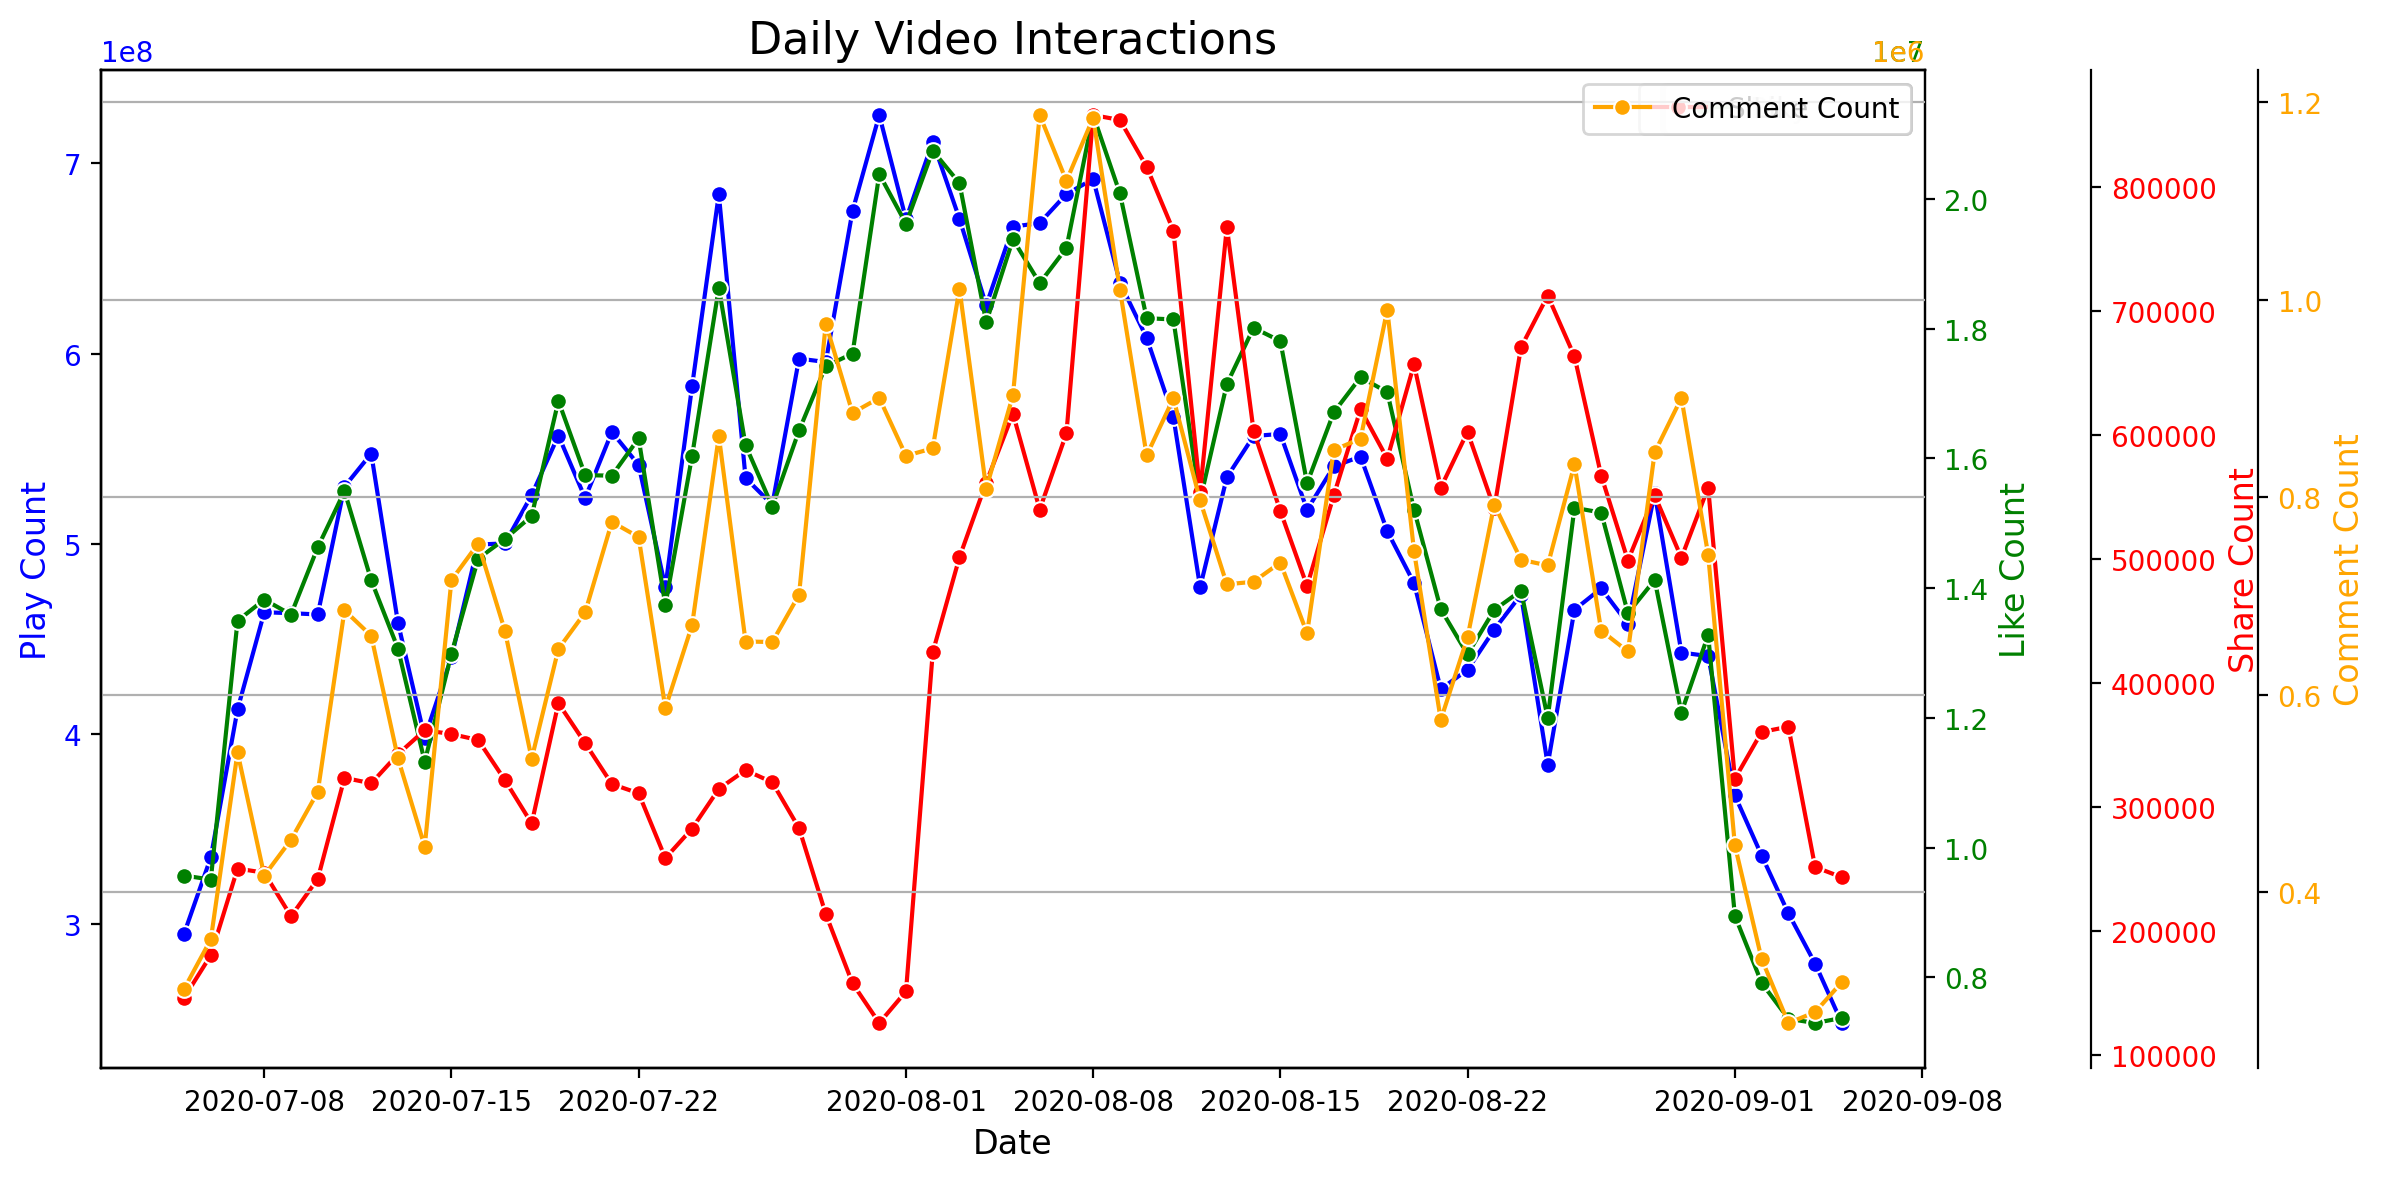

In [145]:
video_daily_stats = video_daily[['date', 'video_id', 'play_cnt', 'like_cnt', 'share_cnt', 'comment_cnt']].groupby(['date']).sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=video_daily_stats, x=video_daily_stats.index, y='play_cnt', label='Play Count', marker='o', ax=ax1, color='b')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Play Count', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

sns.lineplot(data=video_daily_stats, x=video_daily_stats.index, y='like_cnt', label='Like Count', marker='o', ax=ax2, color='g')
ax2.set_ylabel('Like Count', fontsize=12, color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

sns.lineplot(data=video_daily_stats, x=video_daily_stats.index, y='share_cnt', label='Share Count', marker='o', ax=ax3, color='r')
ax3.set_ylabel('Share Count', fontsize=12, color='r')
ax3.tick_params(axis='y', labelcolor='r')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))

sns.lineplot(data=video_daily_stats, x=video_daily_stats.index, y='comment_cnt', label='Comment Count', marker='o', ax=ax4, color='orange')
ax4.set_ylabel('Comment Count', fontsize=12, color='orange')
ax4.tick_params(axis='y', labelcolor='orange')

plt.title('Daily Video Interactions', fontsize=16)
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

#### Weekly Trend

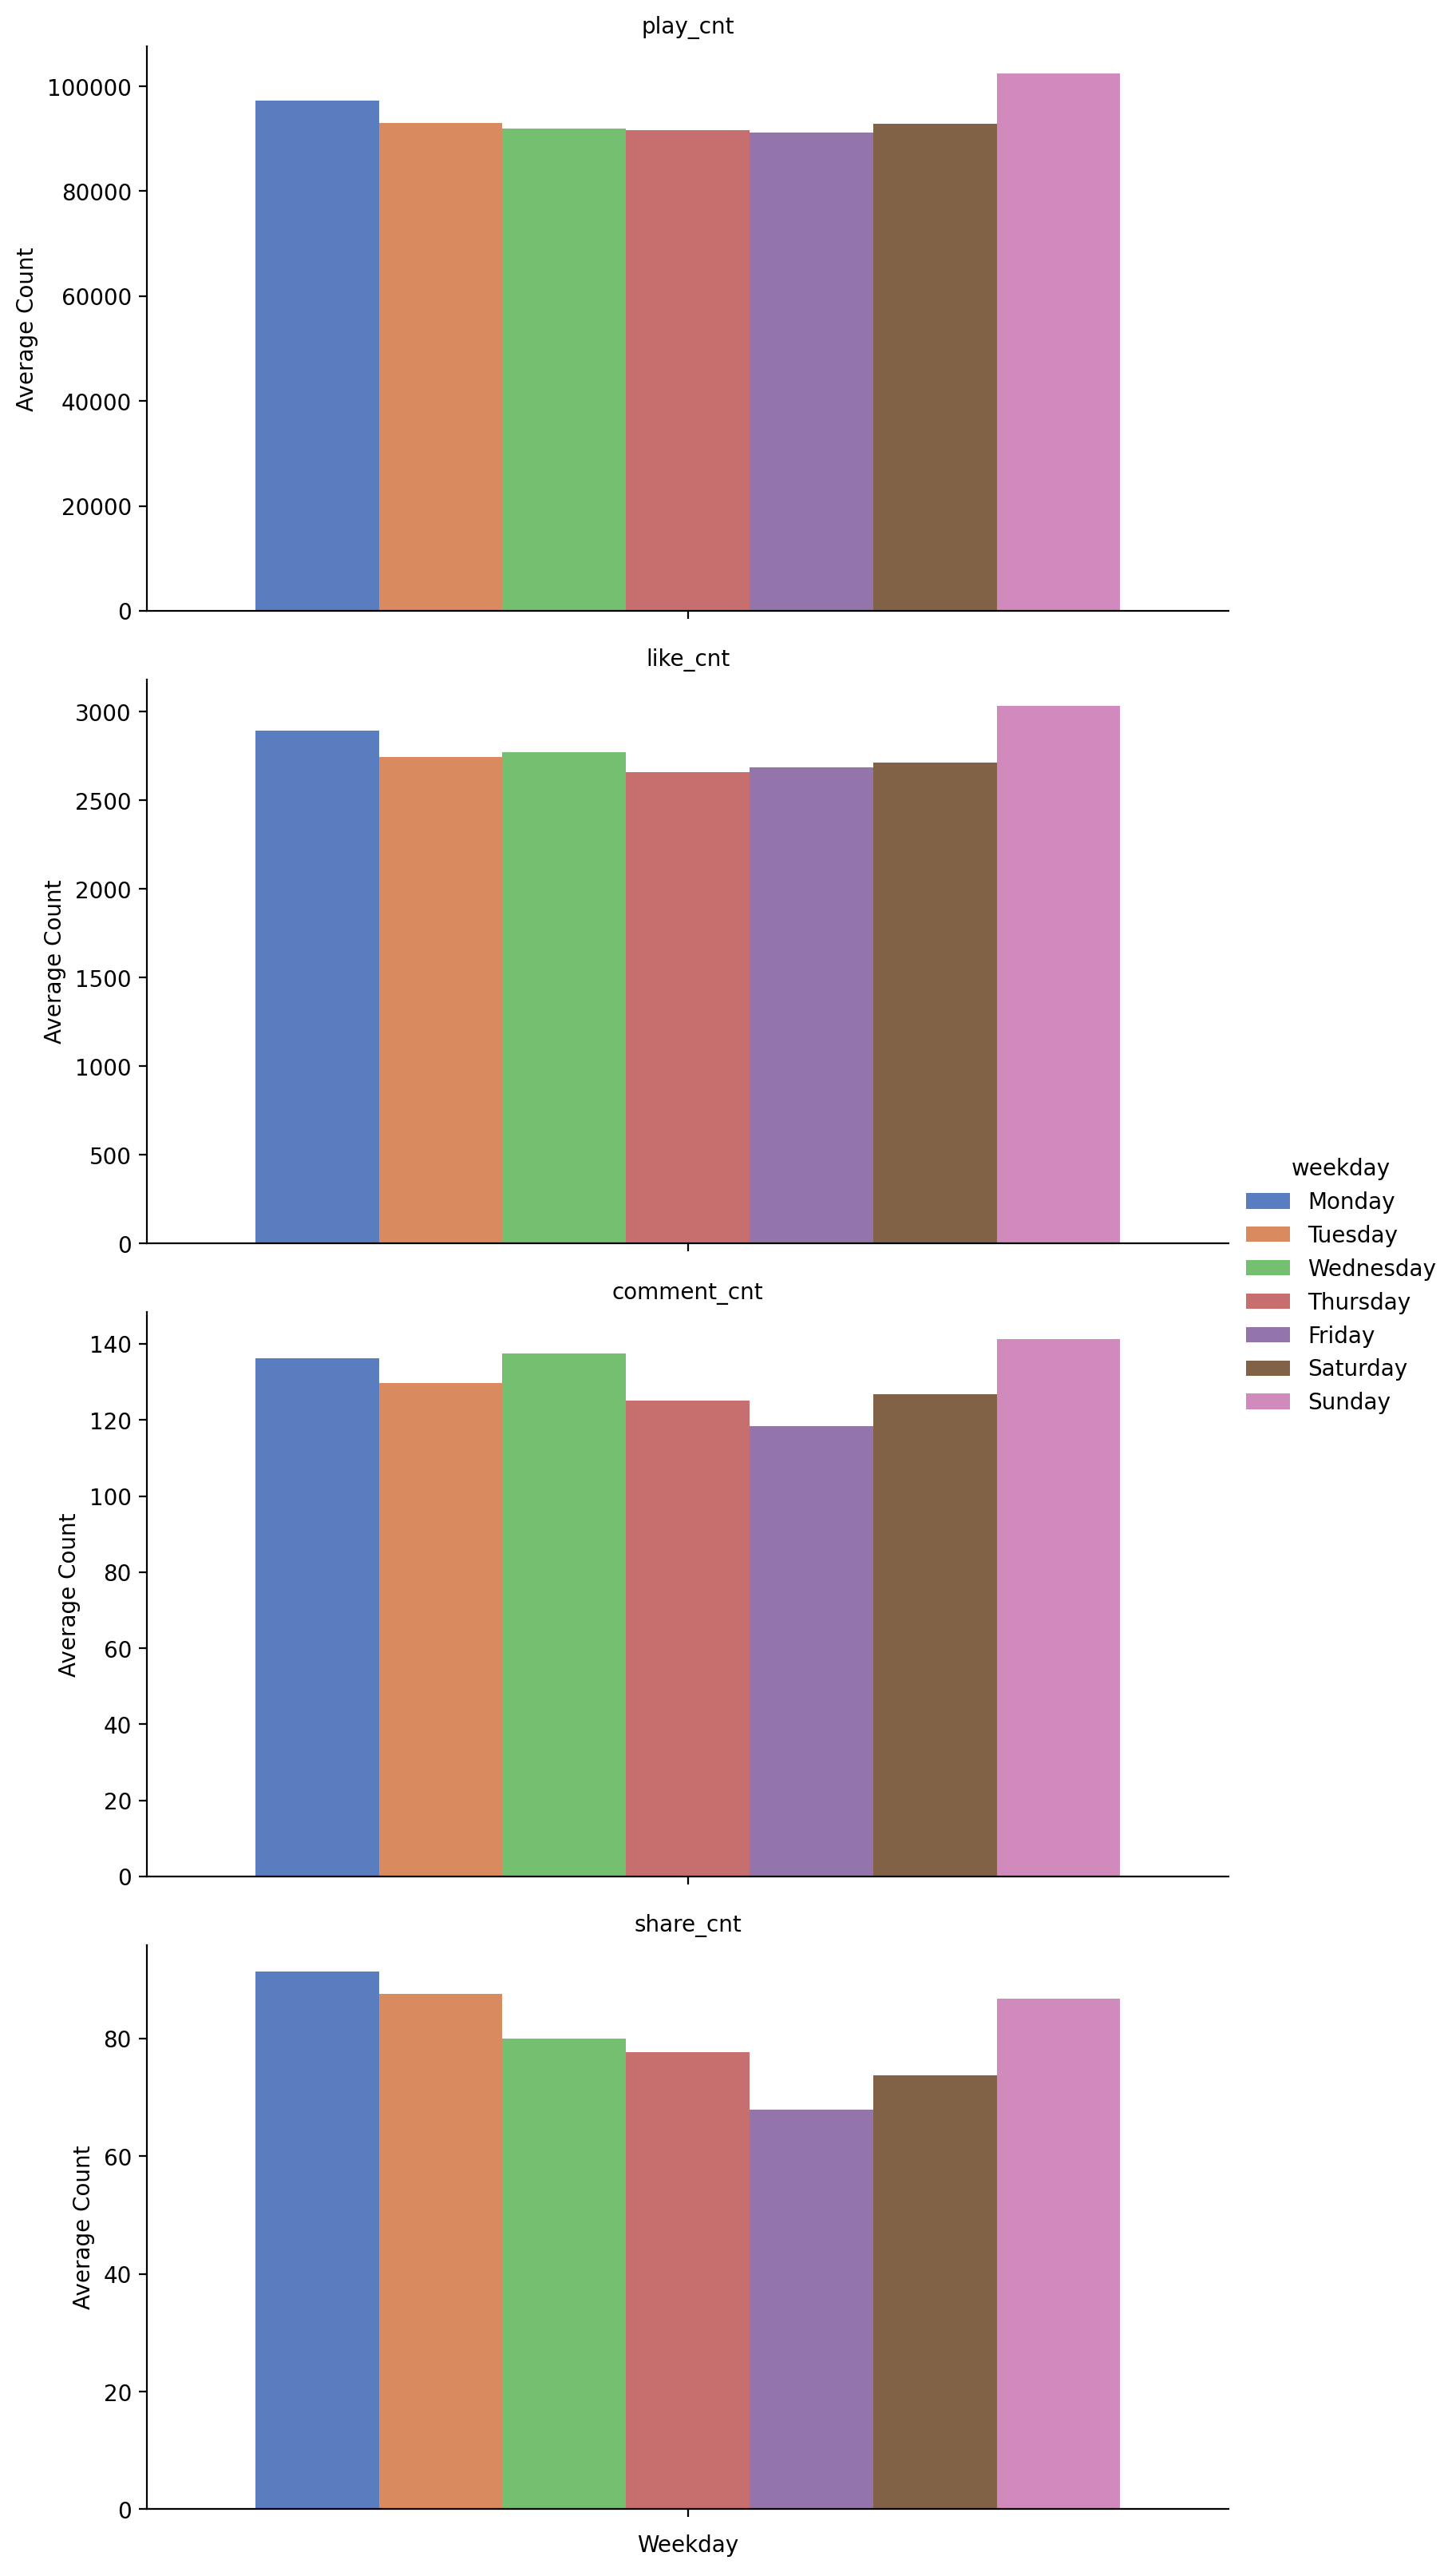

In [31]:
video_weekly_stats_reset = video_daily.reset_index()
video_weekly_stats_reset['weekday'] = video_weekly_stats_reset['date'].dt.day_name()

weekday_avg = video_weekly_stats_reset.groupby('weekday')[['play_cnt', 'like_cnt', 'comment_cnt', 'share_cnt']].mean()
weekday_avg = weekday_avg.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekday_melted = weekday_avg.reset_index().melt(id_vars='weekday', 
                                                 value_vars=['play_cnt', 'like_cnt', 'comment_cnt', 'share_cnt'],
                                                 var_name='interaction_type',
                                                 value_name='count')

g = sns.catplot(
    data=weekday_melted,
    kind='bar',
    hue='weekday',
    y='count',
    col='interaction_type',
    col_wrap=1,
    height=4,
    aspect=2,
    sharey=False,
    palette='muted'
)

g.set_titles('{col_name}')
g.set_axis_labels('Weekday', 'Average Count')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()